# Data Preparation





Load data and library

In [ ]:
import pandas as pd
import numpy as np
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer# For feature scaling
from sklearn.cluster import KMeans # K-means clustering
from yellowbrick.cluster import SilhouetteVisualizer # Untuk melakukan analisis siluet untuk k-means clustering

# NEW LIBRARY TO LEARN TODAY
import pickle # menyimpan model kita dalam format pickle nanti (pickle ga cuma untuk dataframe aja, tp semua hal di python include variabel)
from sklearn.linear_model import LogisticRegression # train logistic regression model
from sklearn.model_selection import train_test_split # split training and testing
from sklearn.metrics import classification_report, confusion_matrix # model performance report
from sklearn.metrics import roc_curve, auc, roc_auc_score # melihat performa dari hasil model kita

In [ ]:
# url = "https://drive.google.com/file/d/1yZ4LCxiXWzJ8C-4lHHEyQ9vtRd0DxblC/view"
# output = 'sales_data.csv'
# gdown.download(url, output, quiet=False, fuzzy=True)

# Propensity Model to Cross Sell (XSell)

# DATA PREPARATION FOR PROPENSITY MODEL

Import different dataset

- Past: Before 31 Jan 2023
- Present: 31 Jan 2023
- Future: Feb - April 2023

In [ ]:
url = "https://drive.google.com/file/d/1T8dA2AF7j0XlPQoz_IJDauE5IrRwODWm/view"
output = "sales_data_ext.csv"

# Download
url = 'https://drive.google.com/uc?id=' + url.split('/')[5]
!wget --no-check-certificate {url} -O {output}

--2024-03-23 01:43:31--  https://drive.google.com/uc?id=1T8dA2AF7j0XlPQoz_IJDauE5IrRwODWm
Resolving drive.google.com (drive.google.com)... 209.85.147.100, 209.85.147.102, 209.85.147.113, ...
Connecting to drive.google.com (drive.google.com)|209.85.147.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1T8dA2AF7j0XlPQoz_IJDauE5IrRwODWm [following]
--2024-03-23 01:43:31--  https://drive.usercontent.google.com/download?id=1T8dA2AF7j0XlPQoz_IJDauE5IrRwODWm
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.147.132, 2607:f8b0:4001:c20::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.147.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1033428 (1009K) [application/octet-stream]
Saving to: ‘sales_data_ext.csv’

sales_data_ext.csv  100%[===================>]   1009K  --.-KB/s    in 0.007s  

2024-03-23 01:43:32 (143 M

In [ ]:
url = "https://drive.google.com/file/d/1Ji3T9T_IjmsKS22ZVmbL6VuHn_1HhiPA/view"
output = "xsell_campaign_result.csv"

# Download
url = 'https://drive.google.com/uc?id=' + url.split('/')[5]
!wget --no-check-certificate {url} -O {output}

--2024-03-23 01:43:32--  https://drive.google.com/uc?id=1Ji3T9T_IjmsKS22ZVmbL6VuHn_1HhiPA
Resolving drive.google.com (drive.google.com)... 209.85.147.100, 209.85.147.102, 209.85.147.113, ...
Connecting to drive.google.com (drive.google.com)|209.85.147.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Ji3T9T_IjmsKS22ZVmbL6VuHn_1HhiPA [following]
--2024-03-23 01:43:32--  https://drive.usercontent.google.com/download?id=1Ji3T9T_IjmsKS22ZVmbL6VuHn_1HhiPA
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 209.85.147.132, 2607:f8b0:4001:c20::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|209.85.147.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299661 (293K) [application/octet-stream]
Saving to: ‘xsell_campaign_result.csv’

xsell_campaign_resu 100%[===================>] 292.64K  --.-KB/s    in 0.002s  

2024-03-23 01:43:33 (

In [ ]:
pd.read_csv("/content/sales_data_ext.csv")

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
0,100000006,X,A,91.0000,0,25000.0000,1,NaN,0,25000.0000,26,5,1996-11-03
1,100000038,X,A,69.0000,0,9000.0000,5,10000.0000,2,10000.0000,25,10,1971-04-24
2,100000382,X,A,123.0000,1,17330.0000,6,16000.0000,3,20000.0000,18,6,1953-01-16
3,100000453,X,A,88.0000,1,14000.0000,4,14670.0000,3,15000.0000,24,6,1944-11-27
4,100000472,X,A,120.0000,0,12500.0000,1,12500.0000,1,15000.0000,23,5,1973-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16482,101059900,Z,E,21.0000,1,15000.0000,1,15000.0000,1,15000.0000,21,3,1970-05-27
16483,101059915,Z,E,19.0000,0,20000.0000,1,NaN,0,20000.0000,19,4,1952-03-04
16484,101059935,Z,E,21.0000,0,20000.0000,1,20000.0000,1,20000.0000,21,4,1981-10-23
16485,101059941,Z,E,17.0000,0,20000.0000,2,20000.0000,2,20000.0000,17,6,1975-07-21


In [ ]:
pd.read_csv("/content/xsell_campaign_result.csv")

,account_id,xsell_success,xsell_sales,xsell_count
0,100000006,0,NaN,0.0000
1,100000038,1,10000.0000,2.0000
2,100000382,0,NaN,0.0000
3,100000453,0,NaN,0.0000
4,100000472,0,NaN,0.0000
...,...,...,...,...
16482,101059900,0,NaN,0.0000
16483,101059915,0,NaN,0.0000
16484,101059935,0,NaN,0.0000
16485,101059941,0,NaN,0.0000


In [ ]:
prop = pd.read_csv("/content/sales_data_ext.csv")
prop.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
0,100000006,X,A,91.0000,0,25000.0000,1,NaN,0,25000.0000,26,5,1996-11-03
1,100000038,X,A,69.0000,0,9000.0000,5,10000.0000,2,10000.0000,25,10,1971-04-24
2,100000382,X,A,123.0000,1,17330.0000,6,16000.0000,3,20000.0000,18,6,1953-01-16
3,100000453,X,A,88.0000,1,14000.0000,4,14670.0000,3,15000.0000,24,6,1944-11-27
4,100000472,X,A,120.0000,0,12500.0000,1,12500.0000,1,15000.0000,23,5,1973-01-09


In [ ]:
xsell = pd.read_csv("/content/xsell_campaign_result.csv")
xsell.head()

,account_id,xsell_success,xsell_sales,xsell_count
0,100000006,0,NaN,0.0000
1,100000038,1,10000.0000,2.0000
2,100000382,0,NaN,0.0000
3,100000453,0,NaN,0.0000
4,100000472,0,NaN,0.0000


In [ ]:
# Create a new dataframe to hold the target variable

# Ambil account ID dari orang yang loannya diapprove di 2017 dan 2018
df_target = xsell[(xsell['xsell_success'] == 1) & (xsell['xsell_count'] > 0)][['account_id']].copy()
# Kita labeli account ID ini dengan angka 1, sisanya utk nasabah lain akan dilabeli angka 0
df_target['target'] = 1
df_target

,account_id,target
1,100000038,1
5,100000612,1
8,100000862,1
12,100001304,1
15,100001442,1
...,...,...
16462,101058907,1
16463,101058946,1
16473,101059507,1
16476,101059655,1


### Check for unique type and typo for object datafile

In [ ]:
# Use value_count function to check each categorical column & compare it to the data dictionary
for nama_kolom in prop.select_dtypes(include=['object']).columns:
  print(nama_kolom)
  print(prop[nama_kolom].value_counts())
  print('\n')

account_activity_level
X      11656
Z       3675
Y       1155
XYZ        1
Name: account_activity_level, dtype: int64


customer_value_level
E    5868
B    3071
A    2937
C    2683
D    1927
F       1
Name: customer_value_level, dtype: int64


birth_date
1951-03-10    7
1944-06-12    6
1977-01-17    6
1944-11-26    6
1948-01-18    5
             ..
1981-03-24    1
1950-08-13    1
1975-07-06    1
1942-08-16    1
1975-08-21    1
Name: birth_date, Length: 11461, dtype: int64




XYZ and F need to be dropped

In [ ]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16487 entries, 0 to 16486
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               16487 non-null  int64  
 1   account_activity_level   16487 non-null  object 
 2   customer_value_level     16487 non-null  object 
 3   MOB                      16487 non-null  float64
 4   flag_female              16487 non-null  int64  
 5   avg_sales_L36M           15726 non-null  float64
 6   cnt_sales_L36M           16487 non-null  int64  
 7   avg_sales_L36M_promo     12094 non-null  float64
 8   cnt_sales_L36M_promo     16487 non-null  int64  
 9   last_sales               16487 non-null  float64
 10  month_since_last_sales   16487 non-null  int64  
 11  count_direct_promo_L12M  16487 non-null  int64  
 12  birth_date               16487 non-null  object 
dtypes: float64(4), int64(6), object(3)
memory usage: 1.6+ MB


there are several missing data from avg_sales_L36M and avg_sales_L36M_promo

### Check Missing Values

In [ ]:
# check for missing values
prop.isnull().sum()

account_id                    0
account_activity_level        0
customer_value_level          0
MOB                           0
flag_female                   0
avg_sales_L36M              761
cnt_sales_L36M                0
avg_sales_L36M_promo       4393
cnt_sales_L36M_promo          0
last_sales                    0
month_since_last_sales        0
count_direct_promo_L12M       0
birth_date                    0
dtype: int64

there are 761 missing values on 'avg_sales' and 4393 missing values on 'avg_sales_promo'

In [ ]:
prop[prop.isnull().any(axis='columns')]

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
0,100000006,X,A,91.0000,0,25000.0000,1,NaN,0,25000.0000,26,5,1996-11-03
8,100000862,X,A,51.0000,1,13670.0000,2,NaN,0,15000.0000,17,5,1978-05-17
14,100001433,X,A,84.0000,1,32000.0000,2,NaN,0,30000.0000,25,6,1982-07-26
19,100001640,X,A,57.0000,1,25000.0000,2,NaN,1,25000.0000,27,6,1956-11-20
30,100002370,Z,A,110.0000,0,NaN,0,NaN,0,15000.0000,56,3,1972-08-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16454,101058421,X,E,126.0000,0,14000.0000,2,NaN,0,15000.0000,24,6,1979-10-27
16455,101058461,X,E,80.0000,1,15000.0000,2,NaN,0,20000.0000,18,6,1939-06-12
16475,101059624,X,E,32.0000,0,13000.0000,3,NaN,0,15000.0000,17,5,1983-04-11
16476,101059655,Y,E,129.0000,1,11800.0000,4,NaN,0,15000.0000,14,5,1976-09-18


In [ ]:
# missing values for avg_sales
prop[prop['avg_sales_L36M'].isnull()]

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
30,100002370,Z,A,110.0000,0,NaN,0,NaN,0,15000.0000,56,3,1972-08-18
34,100002547,X,A,61.0000,0,NaN,0,NaN,0,15000.0000,61,3,1987-07-24
47,100003731,X,A,54.0000,1,NaN,0,NaN,0,15000.0000,54,6,1954-03-30
81,100005474,Z,A,56.0000,0,NaN,0,NaN,0,15000.0000,56,2,1971-04-11
117,100008094,X,B,127.0000,1,NaN,0,NaN,0,15000.0000,53,3,1983-07-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16394,101054957,Z,E,51.0000,1,NaN,0,NaN,0,15000.0000,51,3,1993-01-22
16407,101055421,X,E,54.0000,0,NaN,0,NaN,0,15000.0000,52,5,1949-04-26
16417,101055837,Z,E,51.0000,0,NaN,0,NaN,0,15000.0000,51,3,1990-08-30
16438,101057435,X,E,123.0000,0,NaN,0,NaN,0,15000.0000,53,5,1957-05-23


In [ ]:
# missing values for avg_sales_promo
prop[prop['avg_sales_L36M_promo'].isnull()]

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
0,100000006,X,A,91.0000,0,25000.0000,1,NaN,0,25000.0000,26,5,1996-11-03
8,100000862,X,A,51.0000,1,13670.0000,2,NaN,0,15000.0000,17,5,1978-05-17
14,100001433,X,A,84.0000,1,32000.0000,2,NaN,0,30000.0000,25,6,1982-07-26
19,100001640,X,A,57.0000,1,25000.0000,2,NaN,1,25000.0000,27,6,1956-11-20
30,100002370,Z,A,110.0000,0,NaN,0,NaN,0,15000.0000,56,3,1972-08-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16454,101058421,X,E,126.0000,0,14000.0000,2,NaN,0,15000.0000,24,6,1979-10-27
16455,101058461,X,E,80.0000,1,15000.0000,2,NaN,0,20000.0000,18,6,1939-06-12
16475,101059624,X,E,32.0000,0,13000.0000,3,NaN,0,15000.0000,17,5,1983-04-11
16476,101059655,Y,E,129.0000,1,11800.0000,4,NaN,0,15000.0000,14,5,1976-09-18


### Check duplicates

In [ ]:
prop.duplicated().sum()

0

In [ ]:
prop[prop.duplicated()]

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date


NO DUPLICATES

## DATA CLEANING

In [ ]:
prop2 = prop.copy()

### change birthdate to datetime

In [ ]:
# ubah jadi date time
prop2['birth_date'] = pd.to_datetime(prop2['birth_date'])
prop2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16487 entries, 0 to 16486
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               16487 non-null  int64         
 1   account_activity_level   16487 non-null  object        
 2   customer_value_level     16487 non-null  object        
 3   MOB                      16487 non-null  float64       
 4   flag_female              16487 non-null  int64         
 5   avg_sales_L36M           15726 non-null  float64       
 6   cnt_sales_L36M           16487 non-null  int64         
 7   avg_sales_L36M_promo     12094 non-null  float64       
 8   cnt_sales_L36M_promo     16487 non-null  int64         
 9   last_sales               16487 non-null  float64       
 10  month_since_last_sales   16487 non-null  int64         
 11  count_direct_promo_L12M  16487 non-null  int64         
 12  birth_date               16487 n

In [ ]:
# Menghitung UMUR
prop2['client_age']  = (datetime(year=2023, month=1, day=31) - prop2['birth_date']) // np.timedelta64(1,'Y')
prop2

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age
0,100000006,X,A,91.0000,0,25000.0000,1,NaN,0,25000.0000,26,5,1996-11-03,26
1,100000038,X,A,69.0000,0,9000.0000,5,10000.0000,2,10000.0000,25,10,1971-04-24,51
2,100000382,X,A,123.0000,1,17330.0000,6,16000.0000,3,20000.0000,18,6,1953-01-16,70
3,100000453,X,A,88.0000,1,14000.0000,4,14670.0000,3,15000.0000,24,6,1944-11-27,78
4,100000472,X,A,120.0000,0,12500.0000,1,12500.0000,1,15000.0000,23,5,1973-01-09,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16482,101059900,Z,E,21.0000,1,15000.0000,1,15000.0000,1,15000.0000,21,3,1970-05-27,52
16483,101059915,Z,E,19.0000,0,20000.0000,1,NaN,0,20000.0000,19,4,1952-03-04,70
16484,101059935,Z,E,21.0000,0,20000.0000,1,20000.0000,1,20000.0000,21,4,1981-10-23,41
16485,101059941,Z,E,17.0000,0,20000.0000,2,20000.0000,2,20000.0000,17,6,1975-07-21,47


### change account id from datatype int to object

In [ ]:
prop2[['account_id']] = prop2[['account_id']].astype(str)
prop2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16487 entries, 0 to 16486
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               16487 non-null  object        
 1   account_activity_level   16487 non-null  object        
 2   customer_value_level     16487 non-null  object        
 3   MOB                      16487 non-null  float64       
 4   flag_female              16487 non-null  int64         
 5   avg_sales_L36M           15726 non-null  float64       
 6   cnt_sales_L36M           16487 non-null  int64         
 7   avg_sales_L36M_promo     12094 non-null  float64       
 8   cnt_sales_L36M_promo     16487 non-null  int64         
 9   last_sales               16487 non-null  float64       
 10  month_since_last_sales   16487 non-null  int64         
 11  count_direct_promo_L12M  16487 non-null  int64         
 12  birth_date               16487 n

In [ ]:
xsell[['account_id']] = xsell[['account_id']].astype(str)
xsell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16487 entries, 0 to 16486
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   account_id     16487 non-null  object 
 1   xsell_success  16487 non-null  int64  
 2   xsell_sales    2946 non-null   float64
 3   xsell_count    16487 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 515.3+ KB


In [ ]:
df_target[['account_id']] = df_target[['account_id']].astype(str)
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2946 entries, 1 to 16480
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   account_id  2946 non-null   object
 1   target      2946 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 69.0+ KB


### DROP F and XYZ

In [ ]:
# DROP F
prop2 = prop2[~prop2['customer_value_level'].str.contains('F')]
prop2['customer_value_level'].value_counts()

E    5868
B    3071
A    2937
C    2683
D    1927
Name: customer_value_level, dtype: int64

In [ ]:
#DROP XYZ
prop2 = prop2[prop2['account_activity_level'] != "XYZ"]
prop2['account_activity_level'].value_counts()

X    11656
Z     3675
Y     1154
Name: account_activity_level, dtype: int64

### impute 1 count sales with last sales

In [ ]:
criteria = (prop2['avg_sales_L36M'] == 0) & (prop2['cnt_sales_L36M'] == 1)

#we define the calculation as a subquery (?)
replace_value = prop2[criteria]['cnt_sales_L36M'] * prop2[criteria]['last_sales']

#replace value with loc[condition, column] = value
prop2.loc[criteria, 'avg_sales_L36M'] = replace_value

In [ ]:
prop2[(prop2['avg_sales_L36M'] == 0) & (prop2['cnt_sales_L36M'] == 1)]

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age


all of null values are imputed based on cnt_sales 1 and last_sales

### filter age 21

In [ ]:
# filter age and put to dataframe
prop2 = prop2[prop2['client_age'] >= 21]
prop2

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age
0,100000006,X,A,91.0000,0,25000.0000,1,NaN,0,25000.0000,26,5,1996-11-03,26
1,100000038,X,A,69.0000,0,9000.0000,5,10000.0000,2,10000.0000,25,10,1971-04-24,51
2,100000382,X,A,123.0000,1,17330.0000,6,16000.0000,3,20000.0000,18,6,1953-01-16,70
3,100000453,X,A,88.0000,1,14000.0000,4,14670.0000,3,15000.0000,24,6,1944-11-27,78
4,100000472,X,A,120.0000,0,12500.0000,1,12500.0000,1,15000.0000,23,5,1973-01-09,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16482,101059900,Z,E,21.0000,1,15000.0000,1,15000.0000,1,15000.0000,21,3,1970-05-27,52
16483,101059915,Z,E,19.0000,0,20000.0000,1,NaN,0,20000.0000,19,4,1952-03-04,70
16484,101059935,Z,E,21.0000,0,20000.0000,1,20000.0000,1,20000.0000,21,4,1981-10-23,41
16485,101059941,Z,E,17.0000,0,20000.0000,2,20000.0000,2,20000.0000,17,6,1975-07-21,47


### drop birthdate

In [ ]:
# We will not use date, so let's drop it. Remember to drop column we use .drop(nama_kol, axis=1)
prop2.drop(['birth_date'], axis=1)
prop2

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age
0,100000006,X,A,91.0000,0,25000.0000,1,NaN,0,25000.0000,26,5,1996-11-03,26
1,100000038,X,A,69.0000,0,9000.0000,5,10000.0000,2,10000.0000,25,10,1971-04-24,51
2,100000382,X,A,123.0000,1,17330.0000,6,16000.0000,3,20000.0000,18,6,1953-01-16,70
3,100000453,X,A,88.0000,1,14000.0000,4,14670.0000,3,15000.0000,24,6,1944-11-27,78
4,100000472,X,A,120.0000,0,12500.0000,1,12500.0000,1,15000.0000,23,5,1973-01-09,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16482,101059900,Z,E,21.0000,1,15000.0000,1,15000.0000,1,15000.0000,21,3,1970-05-27,52
16483,101059915,Z,E,19.0000,0,20000.0000,1,NaN,0,20000.0000,19,4,1952-03-04,70
16484,101059935,Z,E,21.0000,0,20000.0000,1,20000.0000,1,20000.0000,21,4,1981-10-23,41
16485,101059941,Z,E,17.0000,0,20000.0000,2,20000.0000,2,20000.0000,17,6,1975-07-21,47


### fill missing value

In [ ]:
prop3 = prop2.copy()
prop.head(10)

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
0,100000006,X,A,91.0000,0,25000.0000,1,NaN,0,25000.0000,26,5,1996-11-03
1,100000038,X,A,69.0000,0,9000.0000,5,10000.0000,2,10000.0000,25,10,1971-04-24
2,100000382,X,A,123.0000,1,17330.0000,6,16000.0000,3,20000.0000,18,6,1953-01-16
3,100000453,X,A,88.0000,1,14000.0000,4,14670.0000,3,15000.0000,24,6,1944-11-27
4,100000472,X,A,120.0000,0,12500.0000,1,12500.0000,1,15000.0000,23,5,1973-01-09
5,100000612,X,A,84.0000,1,25830.0000,6,26000.0000,5,25000.0000,14,7,1997-06-07
6,100000757,X,A,40.0000,0,25000.0000,3,23330.0000,2,25000.0000,17,5,1989-09-13
7,100000769,X,A,29.0000,1,12500.0000,3,15000.0000,2,15000.0000,19,5,1963-08-12
8,100000862,X,A,51.0000,1,13670.0000,2,NaN,0,15000.0000,17,5,1978-05-17
9,100000932,X,A,45.0000,1,9000.0000,4,9000.0000,1,10000.0000,18,6,1971-11-05


In [ ]:
prop3['avg_sales_L36M'] = prop3['avg_sales_L36M'].fillna(0)
prop3.isnull().sum()

account_id                    0
account_activity_level        0
customer_value_level          0
MOB                           0
flag_female                   0
avg_sales_L36M                0
cnt_sales_L36M                0
avg_sales_L36M_promo       4354
cnt_sales_L36M_promo          0
last_sales                    0
month_since_last_sales        0
count_direct_promo_L12M       0
birth_date                    0
client_age                    0
dtype: int64

For now let's fill null value of avg_sales_promo with 0, for testing

In [ ]:
prop3['avg_sales_L36M_promo'] = prop3['avg_sales_L36M_promo'].fillna(0)
prop3.isnull().sum()

account_id                 0
account_activity_level     0
customer_value_level       0
MOB                        0
flag_female                0
avg_sales_L36M             0
cnt_sales_L36M             0
avg_sales_L36M_promo       0
cnt_sales_L36M_promo       0
last_sales                 0
month_since_last_sales     0
count_direct_promo_L12M    0
birth_date                 0
client_age                 0
dtype: int64

## AFTER CLEANING

In [ ]:
prop_cl = prop3.copy()
prop_cl

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age
0,100000006,X,A,91.0000,0,25000.0000,1,0.0000,0,25000.0000,26,5,1996-11-03,26
1,100000038,X,A,69.0000,0,9000.0000,5,10000.0000,2,10000.0000,25,10,1971-04-24,51
2,100000382,X,A,123.0000,1,17330.0000,6,16000.0000,3,20000.0000,18,6,1953-01-16,70
3,100000453,X,A,88.0000,1,14000.0000,4,14670.0000,3,15000.0000,24,6,1944-11-27,78
4,100000472,X,A,120.0000,0,12500.0000,1,12500.0000,1,15000.0000,23,5,1973-01-09,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16482,101059900,Z,E,21.0000,1,15000.0000,1,15000.0000,1,15000.0000,21,3,1970-05-27,52
16483,101059915,Z,E,19.0000,0,20000.0000,1,0.0000,0,20000.0000,19,4,1952-03-04,70
16484,101059935,Z,E,21.0000,0,20000.0000,1,20000.0000,1,20000.0000,21,4,1981-10-23,41
16485,101059941,Z,E,17.0000,0,20000.0000,2,20000.0000,2,20000.0000,17,6,1975-07-21,47


In [ ]:
xsell

,account_id,xsell_success,xsell_sales,xsell_count
0,100000006,0,NaN,0.0000
1,100000038,1,10000.0000,2.0000
2,100000382,0,NaN,0.0000
3,100000453,0,NaN,0.0000
4,100000472,0,NaN,0.0000
...,...,...,...,...
16482,101059900,0,NaN,0.0000
16483,101059915,0,NaN,0.0000
16484,101059935,0,NaN,0.0000
16485,101059941,0,NaN,0.0000


## Combine all data into 1 df
Combine df_target, client2, trans_bhv3 into 1 df

In [ ]:
# Combine client data with transaction
propensity = prop_cl.merge(df_target, how='left', on='account_id')
propensity

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age,target
0,100000006,X,A,91.0000,0,25000.0000,1,0.0000,0,25000.0000,26,5,1996-11-03,26,NaN
1,100000038,X,A,69.0000,0,9000.0000,5,10000.0000,2,10000.0000,25,10,1971-04-24,51,1.0000
2,100000382,X,A,123.0000,1,17330.0000,6,16000.0000,3,20000.0000,18,6,1953-01-16,70,NaN
3,100000453,X,A,88.0000,1,14000.0000,4,14670.0000,3,15000.0000,24,6,1944-11-27,78,NaN
4,100000472,X,A,120.0000,0,12500.0000,1,12500.0000,1,15000.0000,23,5,1973-01-09,50,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16318,101059900,Z,E,21.0000,1,15000.0000,1,15000.0000,1,15000.0000,21,3,1970-05-27,52,NaN
16319,101059915,Z,E,19.0000,0,20000.0000,1,0.0000,0,20000.0000,19,4,1952-03-04,70,NaN
16320,101059935,Z,E,21.0000,0,20000.0000,1,20000.0000,1,20000.0000,21,4,1981-10-23,41,NaN
16321,101059941,Z,E,17.0000,0,20000.0000,2,20000.0000,2,20000.0000,17,6,1975-07-21,47,NaN


In [ ]:
# Fill missing values with 0 (yang tidak sales, dilabeli 0)
propensity = propensity.fillna(0)
propensity

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age,target
0,100000006,X,A,91.0000,0,25000.0000,1,0.0000,0,25000.0000,26,5,1996-11-03,26,0.0000
1,100000038,X,A,69.0000,0,9000.0000,5,10000.0000,2,10000.0000,25,10,1971-04-24,51,1.0000
2,100000382,X,A,123.0000,1,17330.0000,6,16000.0000,3,20000.0000,18,6,1953-01-16,70,0.0000
3,100000453,X,A,88.0000,1,14000.0000,4,14670.0000,3,15000.0000,24,6,1944-11-27,78,0.0000
4,100000472,X,A,120.0000,0,12500.0000,1,12500.0000,1,15000.0000,23,5,1973-01-09,50,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16318,101059900,Z,E,21.0000,1,15000.0000,1,15000.0000,1,15000.0000,21,3,1970-05-27,52,0.0000
16319,101059915,Z,E,19.0000,0,20000.0000,1,0.0000,0,20000.0000,19,4,1952-03-04,70,0.0000
16320,101059935,Z,E,21.0000,0,20000.0000,1,20000.0000,1,20000.0000,21,4,1981-10-23,41,0.0000
16321,101059941,Z,E,17.0000,0,20000.0000,2,20000.0000,2,20000.0000,17,6,1975-07-21,47,0.0000


In [ ]:
propensity.drop(['birth_date'], axis=1)
propensity

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age,target
0,100000006,X,A,91.0000,0,25000.0000,1,0.0000,0,25000.0000,26,5,1996-11-03,26,0.0000
1,100000038,X,A,69.0000,0,9000.0000,5,10000.0000,2,10000.0000,25,10,1971-04-24,51,1.0000
2,100000382,X,A,123.0000,1,17330.0000,6,16000.0000,3,20000.0000,18,6,1953-01-16,70,0.0000
3,100000453,X,A,88.0000,1,14000.0000,4,14670.0000,3,15000.0000,24,6,1944-11-27,78,0.0000
4,100000472,X,A,120.0000,0,12500.0000,1,12500.0000,1,15000.0000,23,5,1973-01-09,50,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16318,101059900,Z,E,21.0000,1,15000.0000,1,15000.0000,1,15000.0000,21,3,1970-05-27,52,0.0000
16319,101059915,Z,E,19.0000,0,20000.0000,1,0.0000,0,20000.0000,19,4,1952-03-04,70,0.0000
16320,101059935,Z,E,21.0000,0,20000.0000,1,20000.0000,1,20000.0000,21,4,1981-10-23,41,0.0000
16321,101059941,Z,E,17.0000,0,20000.0000,2,20000.0000,2,20000.0000,17,6,1975-07-21,47,0.0000


In [ ]:
propensity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16323 entries, 0 to 16322
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               16323 non-null  object        
 1   account_activity_level   16323 non-null  object        
 2   customer_value_level     16323 non-null  object        
 3   MOB                      16323 non-null  float64       
 4   flag_female              16323 non-null  int64         
 5   avg_sales_L36M           16323 non-null  float64       
 6   cnt_sales_L36M           16323 non-null  int64         
 7   avg_sales_L36M_promo     16323 non-null  float64       
 8   cnt_sales_L36M_promo     16323 non-null  int64         
 9   last_sales               16323 non-null  float64       
 10  month_since_last_sales   16323 non-null  int64         
 11  count_direct_promo_L12M  16323 non-null  int64         
 12  birth_date               16323 n

# Feature Engineering
Analyze and transform the raw data into meaningful features that can be used by the model. This may involve creating new variables or encoding categorical variables. Feature engineering can significantly impact the model's predictive power, so it's important to invest time in this step.

## Creating new variables (optional, gadikerjain gapapa)

Let's create 4 new variables:
- total_sales, the sum of avg_sales_L36M and cnt_sales_L36M
- total_sales_promo, the sum of avg_sales_L36M_promo and cnt_sales_L36M_promo
- promo_percentage, avg_sales_promo / avg_sales
- promo_response_rate, cnt_sales_promo / cnt_sales

In [ ]:
propensity['total_sales'] = propensity['avg_sales_L36M'] * propensity['cnt_sales_L36M']
propensity['total_sales_promo'] = propensity['avg_sales_L36M_promo'] * propensity['cnt_sales_L36M_promo']
propensity['promo_percentage'] = propensity['total_sales_promo'] / propensity['total_sales']
propensity['promo_response_rate'] = propensity['cnt_sales_L36M_promo'] / propensity['cnt_sales_L36M']
propensity

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age,target,total_sales,total_sales_promo,promo_percentage,promo_response_rate
0,100000006,X,A,91.0000,0,25000.0000,1,0.0000,0,25000.0000,26,5,1996-11-03,26,0.0000,25000.0000,0.0000,0.0000,0.0000
1,100000038,X,A,69.0000,0,9000.0000,5,10000.0000,2,10000.0000,25,10,1971-04-24,51,1.0000,45000.0000,20000.0000,0.4444,0.4000
2,100000382,X,A,123.0000,1,17330.0000,6,16000.0000,3,20000.0000,18,6,1953-01-16,70,0.0000,103980.0000,48000.0000,0.4616,0.5000
3,100000453,X,A,88.0000,1,14000.0000,4,14670.0000,3,15000.0000,24,6,1944-11-27,78,0.0000,56000.0000,44010.0000,0.7859,0.7500
4,100000472,X,A,120.0000,0,12500.0000,1,12500.0000,1,15000.0000,23,5,1973-01-09,50,0.0000,12500.0000,12500.0000,1.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16318,101059900,Z,E,21.0000,1,15000.0000,1,15000.0000,1,15000.0000,21,3,1970-05-27,52,0.0000,15000.0000,15000.0000,1.0000,1.0000
16319,101059915,Z,E,19.0000,0,20000.0000,1,0.0000,0,20000.0000,19,4,1952-03-04,70,0.0000,20000.0000,0.0000,0.0000,0.0000
16320,101059935,Z,E,21.0000,0,20000.0000,1,20000.0000,1,20000.0000,21,4,1981-10-23,41,0.0000,20000.0000,20000.0000,1.0000,1.0000
16321,101059941,Z,E,17.0000,0,20000.0000,2,20000.0000,2,20000.0000,17,6,1975-07-21,47,0.0000,40000.0000,40000.0000,1.0000,1.0000


In [ ]:
propensity.drop(['birth_date'], axis=1)
propensity

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age,target,total_sales,total_sales_promo,promo_percentage,promo_response_rate
0,100000006,X,A,91.0000,0,25000.0000,1,0.0000,0,25000.0000,26,5,1996-11-03,26,0.0000,25000.0000,0.0000,0.0000,0.0000
1,100000038,X,A,69.0000,0,9000.0000,5,10000.0000,2,10000.0000,25,10,1971-04-24,51,1.0000,45000.0000,20000.0000,0.4444,0.4000
2,100000382,X,A,123.0000,1,17330.0000,6,16000.0000,3,20000.0000,18,6,1953-01-16,70,0.0000,103980.0000,48000.0000,0.4616,0.5000
3,100000453,X,A,88.0000,1,14000.0000,4,14670.0000,3,15000.0000,24,6,1944-11-27,78,0.0000,56000.0000,44010.0000,0.7859,0.7500
4,100000472,X,A,120.0000,0,12500.0000,1,12500.0000,1,15000.0000,23,5,1973-01-09,50,0.0000,12500.0000,12500.0000,1.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16318,101059900,Z,E,21.0000,1,15000.0000,1,15000.0000,1,15000.0000,21,3,1970-05-27,52,0.0000,15000.0000,15000.0000,1.0000,1.0000
16319,101059915,Z,E,19.0000,0,20000.0000,1,0.0000,0,20000.0000,19,4,1952-03-04,70,0.0000,20000.0000,0.0000,0.0000,0.0000
16320,101059935,Z,E,21.0000,0,20000.0000,1,20000.0000,1,20000.0000,21,4,1981-10-23,41,0.0000,20000.0000,20000.0000,1.0000,1.0000
16321,101059941,Z,E,17.0000,0,20000.0000,2,20000.0000,2,20000.0000,17,6,1975-07-21,47,0.0000,40000.0000,40000.0000,1.0000,1.0000


## Remove outlier

In [ ]:
# total sales
# Calculating the IQR for a DataFrame
Q1prop = propensity['total_sales'].quantile(0.25)
Q3prop = propensity['total_sales'].quantile(0.75)
IQRprop = Q3prop - Q1prop

print('Q1 : ',Q1prop)
print('Q3 : ',Q3prop)
print('IQR: ',IQRprop)

Q1 :  20000.0
Q3 :  43750.0
IQR:  23750.0


In [ ]:
# Outlier detection
min_box_prop = Q1prop - 1.5*IQRprop
max_box_prop = Q3prop + 1.5*IQRprop

criteria1_prop = (propensity['total_sales'] <= min_box_prop)
criteria2_prop = (propensity['total_sales'] >= max_box_prop)

propensity[criteria1_prop | criteria2_prop]

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age,target,total_sales,total_sales_promo,promo_percentage,promo_response_rate
2,100000382,X,A,123.0000,1,17330.0000,6,16000.0000,3,20000.0000,18,6,1953-01-16,70,0.0000,103980.0000,48000.0000,0.4616,0.5000
5,100000612,X,A,84.0000,1,25830.0000,6,26000.0000,5,25000.0000,14,7,1997-06-07,25,1.0000,154980.0000,130000.0000,0.8388,0.8333
21,100001700,X,A,127.0000,0,26250.0000,4,26250.0000,4,25000.0000,4,7,1940-03-18,82,1.0000,105000.0000,105000.0000,1.0000,1.0000
63,100004590,X,A,42.0000,0,17500.0000,5,12500.0000,3,20000.0000,19,7,1934-10-11,88,0.0000,87500.0000,37500.0000,0.4286,0.6000
73,100005189,Y,A,45.0000,0,25000.0000,4,25000.0000,2,25000.0000,16,6,1954-03-16,68,1.0000,100000.0000,50000.0000,0.5000,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16185,101051161,X,C,100.0000,1,19000.0000,7,18860.0000,6,20000.0000,21,4,1965-05-31,57,0.0000,133000.0000,113160.0000,0.8508,0.8571
16202,101052331,X,E,112.0000,1,12380.0000,7,12200.0000,4,15000.0000,14,5,1973-11-15,49,0.0000,86660.0000,48800.0000,0.5631,0.5714
16282,101057953,X,E,105.0000,0,18800.0000,5,18000.0000,3,20000.0000,16,6,1947-04-30,75,0.0000,94000.0000,54000.0000,0.5745,0.6000
16297,101058696,X,E,77.0000,1,17250.0000,5,17250.0000,5,20000.0000,18,7,1958-02-21,64,0.0000,86250.0000,86250.0000,1.0000,1.0000


In [ ]:
# remove outlier total_sales by and copy data frame
propensity = propensity[~(criteria1_prop | criteria2_prop)]
propensity

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,client_age,target,total_sales,total_sales_promo,promo_percentage,promo_response_rate
0,100000006,X,A,91.0000,0,25000.0000,1,0.0000,0,25000.0000,26,5,1996-11-03,26,0.0000,25000.0000,0.0000,0.0000,0.0000
1,100000038,X,A,69.0000,0,9000.0000,5,10000.0000,2,10000.0000,25,10,1971-04-24,51,1.0000,45000.0000,20000.0000,0.4444,0.4000
3,100000453,X,A,88.0000,1,14000.0000,4,14670.0000,3,15000.0000,24,6,1944-11-27,78,0.0000,56000.0000,44010.0000,0.7859,0.7500
4,100000472,X,A,120.0000,0,12500.0000,1,12500.0000,1,15000.0000,23,5,1973-01-09,50,0.0000,12500.0000,12500.0000,1.0000,1.0000
6,100000757,X,A,40.0000,0,25000.0000,3,23330.0000,2,25000.0000,17,5,1989-09-13,33,0.0000,75000.0000,46660.0000,0.6221,0.6667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16318,101059900,Z,E,21.0000,1,15000.0000,1,15000.0000,1,15000.0000,21,3,1970-05-27,52,0.0000,15000.0000,15000.0000,1.0000,1.0000
16319,101059915,Z,E,19.0000,0,20000.0000,1,0.0000,0,20000.0000,19,4,1952-03-04,70,0.0000,20000.0000,0.0000,0.0000,0.0000
16320,101059935,Z,E,21.0000,0,20000.0000,1,20000.0000,1,20000.0000,21,4,1981-10-23,41,0.0000,20000.0000,20000.0000,1.0000,1.0000
16321,101059941,Z,E,17.0000,0,20000.0000,2,20000.0000,2,20000.0000,17,6,1975-07-21,47,0.0000,40000.0000,40000.0000,1.0000,1.0000


## Encoding categorical variables

There are many ways to encode categorical variables, but let's use get_dummies() from pandas.

Concept on encoding: https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f

In [ ]:
# Ambil kolom-kolom yang mau diencoding -> biasanya yg non-numeric

# Pilih kolom yang berupa object (non-numeric). Jadikan mereka jadi list dengan "list()"
categorical_columns = list(propensity[['account_activity_level','customer_value_level']])
categorical_columns

['account_activity_level', 'customer_value_level']

Pastikan kolom yang mau kita prediksi tidak masuk ke sini.

In [ ]:
# Nama kolom yang mau kita prediksi
target_column = 'target'

# Kita pastikan kolom yang mau dipredict tidak akan kita encode
# Jika ada, kita bisa pakai .remove()
if target_column in categorical_columns:
  categorical_columns.remove(target_column)

categorical_columns

['account_activity_level', 'customer_value_level']

In [ ]:
# Jangan lupa copy() dulu karena kita akan mengubah data asli kita
propensity2 = propensity.copy()

# Di sini kita melakukan one-hot encoding untuk kolom-kolom kategorikal tadi
# Khusus gender, karena kita hanya punya 2 kategori, jauh lebih bagus tidak dipisah dalam 2 kolom berbeda
# Jadi hanya pakai 1 kolom, misal 0 = Female, 1 = Male. Bisa pakai drop_first='if_binary' di parameter
propensity2 = pd.get_dummies(propensity2, columns=categorical_columns)

In [ ]:
propensity2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15792 entries, 0 to 16322
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   account_id                15792 non-null  object        
 1   MOB                       15792 non-null  float64       
 2   flag_female               15792 non-null  int64         
 3   avg_sales_L36M            15792 non-null  float64       
 4   cnt_sales_L36M            15792 non-null  int64         
 5   avg_sales_L36M_promo      15792 non-null  float64       
 6   cnt_sales_L36M_promo      15792 non-null  int64         
 7   last_sales                15792 non-null  float64       
 8   month_since_last_sales    15792 non-null  int64         
 9   count_direct_promo_L12M   15792 non-null  int64         
 10  birth_date                15792 non-null  datetime64[ns]
 11  client_age                15792 non-null  int64         
 12  target            

In [ ]:
# Let's fill null values with 0s
propensity2 = propensity2.fillna(0)
propensity2

,account_id,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,...,promo_percentage,promo_response_rate,account_activity_level_X,account_activity_level_Y,account_activity_level_Z,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E
0,100000006,91.0000,0,25000.0000,1,0.0000,0,25000.0000,26,5,...,0.0000,0.0000,1,0,0,1,0,0,0,0
1,100000038,69.0000,0,9000.0000,5,10000.0000,2,10000.0000,25,10,...,0.4444,0.4000,1,0,0,1,0,0,0,0
3,100000453,88.0000,1,14000.0000,4,14670.0000,3,15000.0000,24,6,...,0.7859,0.7500,1,0,0,1,0,0,0,0
4,100000472,120.0000,0,12500.0000,1,12500.0000,1,15000.0000,23,5,...,1.0000,1.0000,1,0,0,1,0,0,0,0
6,100000757,40.0000,0,25000.0000,3,23330.0000,2,25000.0000,17,5,...,0.6221,0.6667,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16318,101059900,21.0000,1,15000.0000,1,15000.0000,1,15000.0000,21,3,...,1.0000,1.0000,0,0,1,0,0,0,0,1
16319,101059915,19.0000,0,20000.0000,1,0.0000,0,20000.0000,19,4,...,0.0000,0.0000,0,0,1,0,0,0,0,1
16320,101059935,21.0000,0,20000.0000,1,20000.0000,1,20000.0000,21,4,...,1.0000,1.0000,0,0,1,0,0,0,0,1
16321,101059941,17.0000,0,20000.0000,2,20000.0000,2,20000.0000,17,6,...,1.0000,1.0000,0,0,1,0,0,0,0,1


In [ ]:
# Set account_id as index of the propensity2
propensity2 = propensity2.set_index('account_id')
propensity2

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,...,promo_percentage,promo_response_rate,account_activity_level_X,account_activity_level_Y,account_activity_level_Z,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E
account_id,,,,,,,,,,,,,,,,,,,,,
100000006,91.0000,0,25000.0000,1,0.0000,0,25000.0000,26,5,1996-11-03,...,0.0000,0.0000,1,0,0,1,0,0,0,0
100000038,69.0000,0,9000.0000,5,10000.0000,2,10000.0000,25,10,1971-04-24,...,0.4444,0.4000,1,0,0,1,0,0,0,0
100000453,88.0000,1,14000.0000,4,14670.0000,3,15000.0000,24,6,1944-11-27,...,0.7859,0.7500,1,0,0,1,0,0,0,0
100000472,120.0000,0,12500.0000,1,12500.0000,1,15000.0000,23,5,1973-01-09,...,1.0000,1.0000,1,0,0,1,0,0,0,0
100000757,40.0000,0,25000.0000,3,23330.0000,2,25000.0000,17,5,1989-09-13,...,0.6221,0.6667,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101059900,21.0000,1,15000.0000,1,15000.0000,1,15000.0000,21,3,1970-05-27,...,1.0000,1.0000,0,0,1,0,0,0,0,1
101059915,19.0000,0,20000.0000,1,0.0000,0,20000.0000,19,4,1952-03-04,...,0.0000,0.0000,0,0,1,0,0,0,0,1
101059935,21.0000,0,20000.0000,1,20000.0000,1,20000.0000,21,4,1981-10-23,...,1.0000,1.0000,0,0,1,0,0,0,0,1


# Split into TRAINing and TEST sample

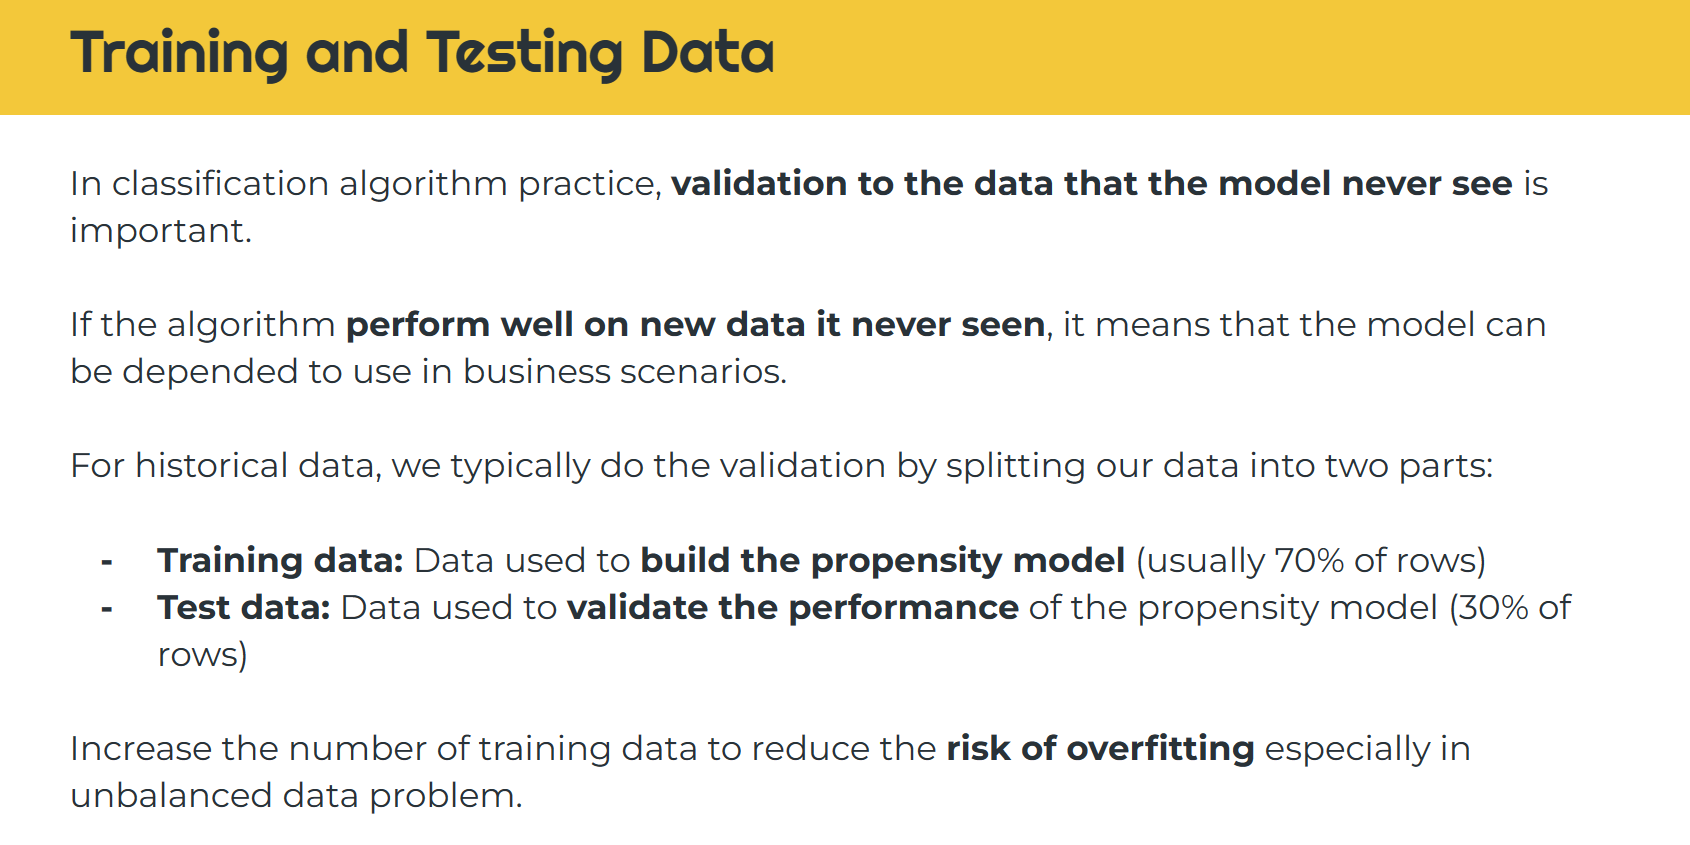

Now we ready to split the dataset into train and test sample.

- Train : 70% --> dipake untuk membuat model
- Test : 30% --> dipake untuk mengecek accuracy / F1Score/ dll dari model tsb


Data test biasanya 10% - 30% dari total datanya

Let's create seperate dataframes for our features and label dataset.

See this on why we should split to training testing, and sometimes need to split training-validation-testing: https://mlu-explain.github.io/train-test-validation/

Sebelum split data, kita pisahkan dulu kolom2 X (predictors / independent variables) dan kolom y (target)

In [ ]:
# Define kolom targetnya dimana
target_column = 'target'

# Buat dataframe kolom predictors
features = propensity2.drop(columns=target_column).copy()
# Buat dataframe kolom target
label = propensity2[target_column].copy()

Di sini kita menggunakan function train_test_split(). Dengan `test_size=0.3`, artinya 30% data kita untuk testing. Data testing adalah data yang tidak akan muncul di train. Jadi model kita bisa jadi belum melihat pola data tersebut sebelumnya.

Ini dilakukan untuk prevent model kita dari overfitting (hanya jago di training, tp testingnya jeblok). Pemilihan mana yang training dan testing dilakukan random. Untuk mem-fix-kan pilihan, define random state.

In [ ]:
# Split into training and test dataset
x_training, x_test, y_training, y_test = train_test_split(features, label, test_size=0.3, random_state=239856293)

In [ ]:
# Check split result
for df in [x_training, x_test, y_training, y_test]:
  print(df.shape)

(11054, 23)
(4738, 23)
(11054,)
(4738,)


In [ ]:
# Let's combine predictors and target. To combine we can use pd.concat(...,axis=1)
# Karena kita akan concat (stake) secara horizontal -> stake kolom
training = pd.concat([x_training, y_training], axis=1)
test = pd.concat([x_test, y_test], axis=1)

In [ ]:
training.head()

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,...,promo_response_rate,account_activity_level_X,account_activity_level_Y,account_activity_level_Z,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E,target
account_id,,,,,,,,,,,,,,,,,,,,,
101011489,128.0000,1,10000.0000,1,10000.0000,1,10000.0000,23,4,1937-04-04,...,1.0000,1,0,0,0,0,0,0,1,0.0000
100424367,38.0000,0,12000.0000,4,10670.0000,2,5000.0000,17,5,1948-12-21,...,0.5000,1,0,0,1,0,0,0,0,0.0000
100870658,21.0000,1,15000.0000,2,15000.0000,2,15000.0000,21,5,1995-06-02,...,1.0000,0,0,1,1,0,0,0,0,0.0000
100814352,101.0000,0,25000.0000,1,0.0000,0,25000.0000,26,4,1943-04-05,...,0.0000,1,0,0,0,0,0,1,0,0.0000
100676843,21.0000,0,20000.0000,1,20000.0000,1,20000.0000,21,4,1983-09-25,...,1.0000,0,0,1,1,0,0,0,0,0.0000


In [ ]:
test.head()

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,...,promo_response_rate,account_activity_level_X,account_activity_level_Y,account_activity_level_Z,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E,target
account_id,,,,,,,,,,,,,,,,,,,,,
100572074,129.0000,0,10400.0000,5,12330.0000,3,10000.0000,18,6,1940-03-17,...,0.6000,1,0,0,0,0,0,0,1,0.0000
100407609,113.0000,0,14000.0000,2,13000.0000,1,15000.0000,17,4,1984-02-11,...,0.5000,1,0,0,1,0,0,0,0,0.0000
100197215,29.0000,1,20000.0000,3,20000.0000,2,20000.0000,18,6,1946-03-01,...,0.6667,1,0,0,1,0,0,0,0,1.0000
100170616,76.0000,0,14000.0000,5,12000.0000,1,20000.0000,20,6,1954-01-26,...,0.2000,1,0,0,0,0,0,0,1,0.0000
100463081,23.0000,1,20000.0000,1,20000.0000,1,20000.0000,23,3,1966-08-27,...,1.0000,0,0,1,0,0,1,0,0,0.0000


# Exploratory Data Analysis on Training Data

## Target check using barchart

Here we can see that the target is very imbalanced against population (only 17% of population activating paylater), so later on we will modify Logistic Regression to account for the difference

Text(0.5, 1.0, 'Training')

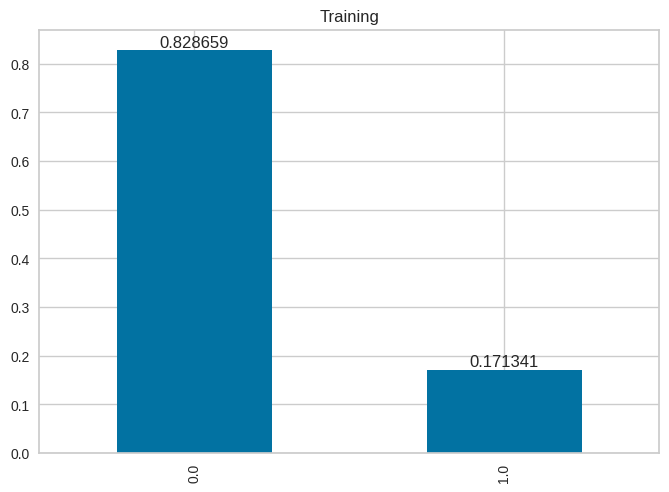

In [ ]:
# Training
ax = training['target'].value_counts(normalize=True).plot(kind='bar')
ax.bar_label(ax.containers[0])
ax.set_title('Training')

Text(0.5, 1.0, 'Test')

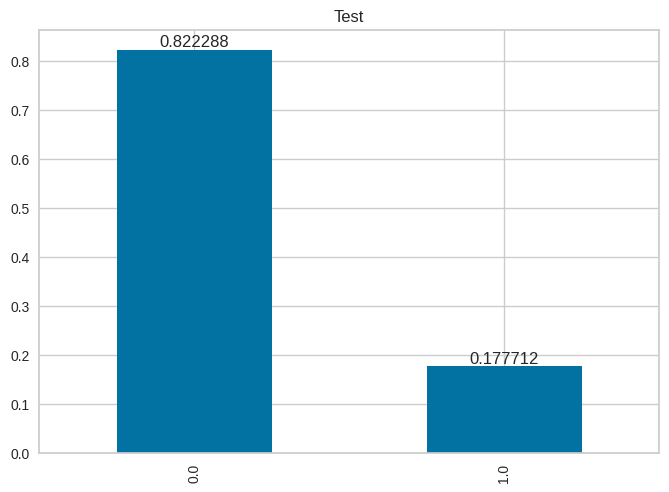

In [ ]:
# Test
ax = test['target'].value_counts(normalize=True).plot(kind='bar')
ax.bar_label(ax.containers[0])
ax.set_title('Test')

Insights:

**Class Imbalance:** The right bar, representing the target data (1.0), is significantly shorter than the left bar (0.0). This indicates a class imbalance in the training data, where there are far more examples of customers who did not use PayLater (0.0) compared to those who did (1.0). In this case, the target data (1.0) occupies around 17% of the dataset.

## Feature check using boxplots & heatmaps
We want to check whether some variables exhibits different behaviours on target=1 and target=0.

Jadi idenya di sini, untuk membantu kita memilih variabel yang bagus yang menjadi pembeda target=1 atau target=0, kita akan mencoba untuk EDA tiap kolom dan kolom target.

Ide visualisasi:
Yang kolom kategori kita show jadi heatmap. Sisanya jadi boxplot.

Disclaimer! Langkah-langkah berikut hanya salah satu dari sekian banyak step yang bisa dilakukan

In [ ]:
# Kumpulkan kolom-kolom kategorik dulu (tadi sudah kita encode, jadi kolom kategori yg value uniquenya cuma 2)
binary_columns = []

for col in training.columns:
  # Ambil yang nunique (jumlah data unique) hanya ada 2
  if training[col].nunique() == 2:
    binary_columns.append(col)

# Karena target ada 2 value jg, jangan lupa diremove, karena kita akan pakai target untuk visualisasi
# dibandingkan dengan kolom lain
binary_columns.remove('target') # bisa pakai list(set(binary_columns) - set('target')) juga
binary_columns

['flag_female',
 'account_activity_level_X',
 'account_activity_level_Y',
 'account_activity_level_Z',
 'customer_value_level_A',
 'customer_value_level_B',
 'customer_value_level_C',
 'customer_value_level_D',
 'customer_value_level_E']

Kita akan membuat plot untuk setiap kolom di binary_columns sebagai heatmap, tetapi harus dibuat menjadi tabel pivot terlebih dahulu.

In [ ]:
# Contoh, kolom "flag_female"
col = 'flag_female'
training[['target', col]].groupby('target').value_counts(normalize=True)

target  flag_female
0.0000  1             0.5400
        0             0.4600
1.0000  1             0.5512
        0             0.4488
dtype: float64

In [ ]:
# Jika reset index, dan memasukkan kolom "name=value", maka bagian value counts akan diberi nama kolom "value"
training[['target', col]].groupby('target').value_counts(normalize=True).reset_index(name="value")

,target,flag_female,value
0,0.0000,1,0.5400
1,0.0000,0,0.4600
2,1.0000,1,0.5512
3,1.0000,0,0.4488


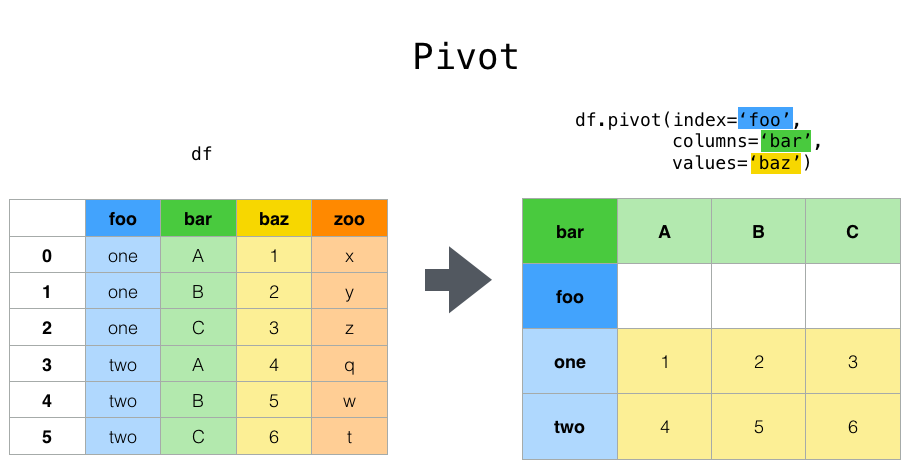

In [ ]:
# Membuat pivot dari hasil sebelumnya
data = training[['target', col]].groupby('target').value_counts(normalize=True).reset_index(name="value")
data.pivot(columns='target', index=col, values='value')

target,0.0000,1.0000
flag_female,,
0,0.4600,0.4488
1,0.5400,0.5512


In [ ]:
# # First, we create the figure and axis
# fig, axes = plt.subplots(9,3, figsize = (12,30))

# # Get smaller font size (settingan seaborn, boleh dicopas aja, jangan dihafal)
# sns.set_context("paper", rc={"font.size":8, "axes.titlesize":8, "axes.labelsize":8})

# # Gambarkan setiap kolom dengan target
# for index, col in enumerate(training.columns):

#   # Kalau kolomnya binary, bisa show sebagai heatmap
#   if col in binary_columns:
#     # Groupby target value, dan rename sesuai ilustrasi sebelumnya
#     data = training[['target', col]].groupby('target').value_counts(normalize=True).reset_index(name="value")
#     data = data.pivot(columns='target', index=col, values='value')
#     sns.heatmap(data, annot=True, fmt=",.3f", ax=axes.flatten()[index])

#   # sisanya jadikan boxplot
#   else:
#     sns.boxplot(data=training, x='target', y=col, hue='target', ax=axes.flatten()[index])

#   axes.flatten()[index].set_title(col)

# plt.tight_layout()

# Variable Removal using Correlation

Typically, we want to build a _**parsimonious** model_. A parsimonious model is a model that accomplishes the desired level of explanation or prediction with as few predictor variables as possible.

We now have **22** number of variables, excluding the target variables. To check whether we can reduce the number of variables, we can use correlation check. Another potential method is to use data reduction methods (e.g. PCA) or regularization, but this is beyond the scope of today's exercise.
<br><br>

Jika kalian menginginkan model yang digunakan untuk menjelaskan pengaruh kolom independen ke kolom dependen, maka langkah ini (menghilangkan collinearity) itu wajib hukumnya.

Tetapi jika kalian hanya ingin membuat model yang digunakan untuk memprediksi, maka langkah ini bisa diskip.

In [ ]:
# Check correlation of features
corr_column = training.select_dtypes(include='number').columns

# Some people may want to check correlation of variables against target
# In that case, leave this code commented.
# corr_column = list(set(corr_column) - set(target_column))

corr_column

Index(['MOB', 'flag_female', 'avg_sales_L36M', 'cnt_sales_L36M',
       'avg_sales_L36M_promo', 'cnt_sales_L36M_promo', 'last_sales',
       'month_since_last_sales', 'count_direct_promo_L12M', 'client_age',
       'total_sales', 'total_sales_promo', 'promo_percentage',
       'promo_response_rate', 'account_activity_level_X',
       'account_activity_level_Y', 'account_activity_level_Z',
       'customer_value_level_A', 'customer_value_level_B',
       'customer_value_level_C', 'customer_value_level_D',
       'customer_value_level_E', 'target'],
      dtype='object')

In [ ]:
# Hitung korelasi di python, pake .corr()
training[corr_column].corr()

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age,...,promo_response_rate,account_activity_level_X,account_activity_level_Y,account_activity_level_Z,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E,target
MOB,1.0000,0.0391,-0.3152,0.2646,-0.2696,0.1108,-0.3235,0.0374,0.1975,0.2859,...,-0.2487,0.5254,-0.0026,-0.5720,-0.0425,-0.0229,-0.0045,-0.0025,0.0582,0.1865
flag_female,0.0391,1.0000,-0.0373,0.0455,-0.0165,0.0314,-0.0443,-0.0155,0.0068,-0.0433,...,-0.0054,0.0280,0.0084,-0.0357,-0.0156,-0.0045,-0.0031,0.0094,0.0123,0.0085
avg_sales_L36M,-0.3152,-0.0373,1.0000,-0.3562,0.4686,-0.2574,0.8439,-0.3626,0.0902,-0.0997,...,0.2163,-0.2310,0.0116,0.2451,0.0544,0.0348,-0.0211,0.0065,-0.0603,-0.2679
cnt_sales_L36M,0.2646,0.0455,-0.3562,1.0000,-0.0483,0.8105,-0.5616,-0.3438,0.4896,0.1173,...,0.1057,0.3732,-0.0364,-0.3848,-0.0286,-0.0311,0.0031,-0.0007,0.0465,0.4028
avg_sales_L36M_promo,-0.2696,-0.0165,0.4686,-0.0483,1.0000,0.2455,0.3645,-0.2217,0.1016,-0.0666,...,0.7656,-0.2109,-0.0108,0.2369,0.0488,0.0292,-0.0049,-0.0241,-0.0431,-0.0873
cnt_sales_L36M_promo,0.1108,0.0314,-0.2574,0.8105,0.2455,1.0000,-0.4261,-0.2397,0.3937,0.0578,...,0.5472,0.1943,-0.0378,-0.1887,0.0052,-0.0179,0.0070,-0.0122,0.0134,0.3049
last_sales,-0.3235,-0.0443,0.8439,-0.5616,0.3645,-0.4261,1.0000,0.0684,-0.0354,-0.1440,...,0.0433,-0.2352,0.0186,0.2452,0.0558,0.0375,-0.0192,0.0099,-0.0674,-0.3541
month_since_last_sales,0.0374,-0.0155,-0.3626,-0.3438,-0.2217,-0.2397,0.0684,1.0000,-0.3576,-0.0652,...,-0.2612,-0.0511,-0.0151,0.0651,-0.0134,0.0133,0.0056,0.0120,-0.0126,-0.1663
count_direct_promo_L12M,0.1975,0.0068,0.0902,0.4896,0.1016,0.3937,-0.0354,-0.3576,1.0000,0.0724,...,0.0799,0.3441,-0.1169,-0.3033,0.0053,-0.0150,-0.0033,0.0017,0.0094,0.1699
client_age,0.2859,-0.0433,-0.0997,0.1173,-0.0666,0.0578,-0.1440,-0.0652,0.0724,1.0000,...,-0.0439,0.1257,-0.0046,-0.1343,0.0008,-0.0228,0.0045,-0.0331,0.0369,0.0736


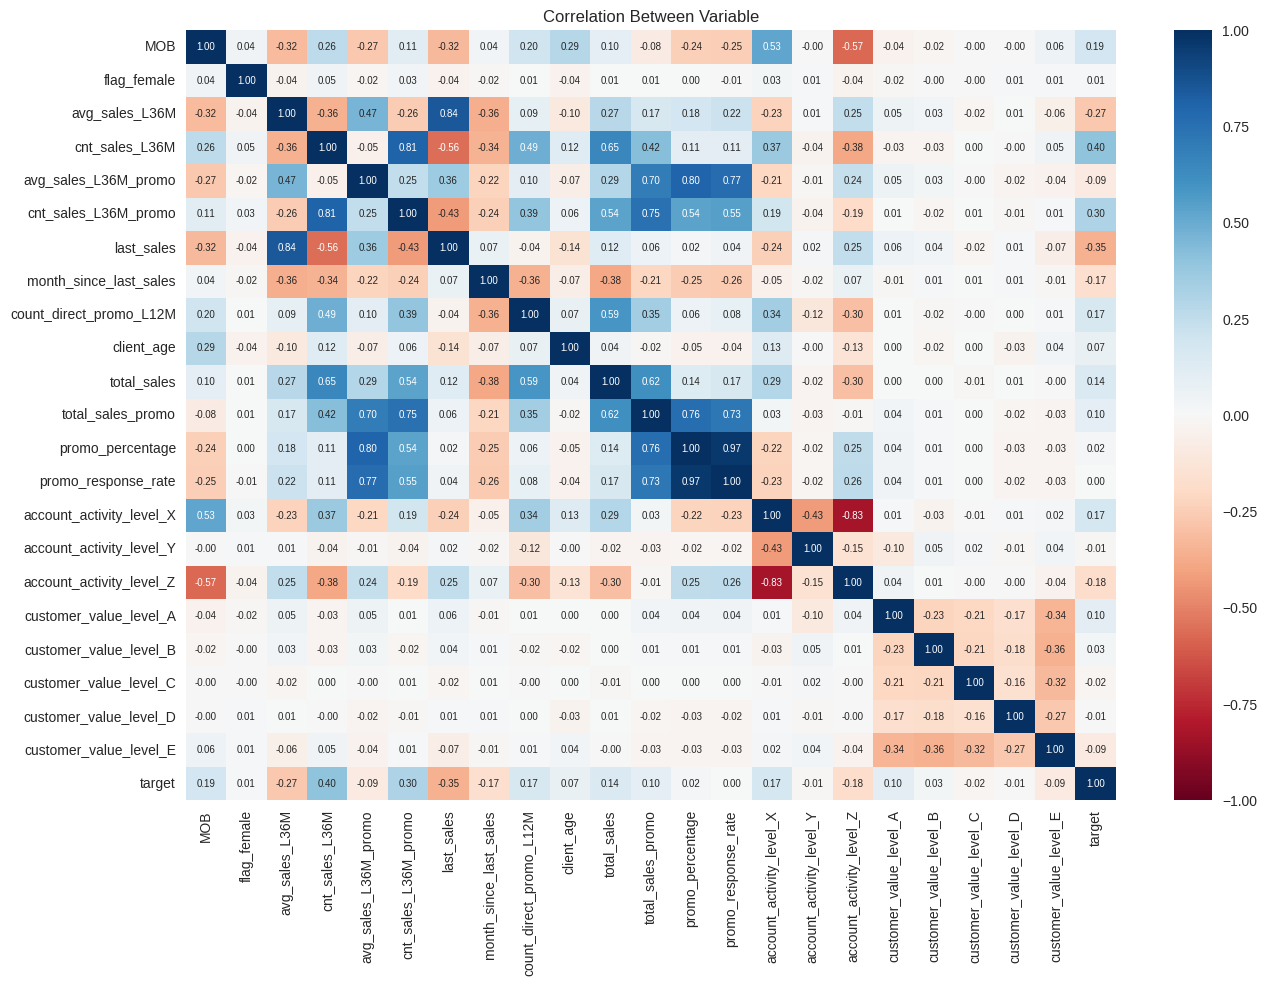

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

ax.set_title('Correlation Between Variable')

sns.heatmap(training[corr_column].corr(),
            vmin=-1, #nilai min heatmap
            vmax=1, #nilai max heatmap
            cmap='RdBu', #warna
            annot=True, #beri label
            annot_kws={"fontsize":7}, #fontsize label
            fmt=",.2f" #format angka di label
            )

plt.show()

Based on above results, we want to remove some variables due to:
- high correlation (>0.5 or <-0.5) with other features
- low correlation with target (seberapa low? yang hampir 0 saja)

In [ ]:
# remove_variables_high_features = ['avg_sales_L36M_promo', 'cnt_sales_L36M_promo','promo_percentage','promo_response_rate','total_sales','total_sales_promo','last_sales','xsell_count', 'account_activity_level_Z', 'account_activity_level_X', 'xsell_sales','birth_date']
remove_variables_high_features = ['avg_sales_L36M_promo', 'cnt_sales_L36M_promo','promo_percentage','promo_response_rate','total_sales','total_sales_promo','last_sales', 'account_activity_level_Z','birth_date']
remove_variables_low_target = ['customer_value_level_D']

In [ ]:
remove_variables_corr = list(set(remove_variables_high_features + remove_variables_low_target))
remove_variables_corr

['total_sales',
 'account_activity_level_Z',
 'avg_sales_L36M_promo',
 'promo_percentage',
 'birth_date',
 'total_sales_promo',
 'cnt_sales_L36M_promo',
 'promo_response_rate',
 'last_sales',
 'customer_value_level_D']

Remove the columns from training and test dataset

In [ ]:
# Let's put the new dataframe for training to "_model"
x_training_model = x_training.drop(remove_variables_corr, axis=1)
x_test_model = x_test.drop(remove_variables_corr, axis=1)

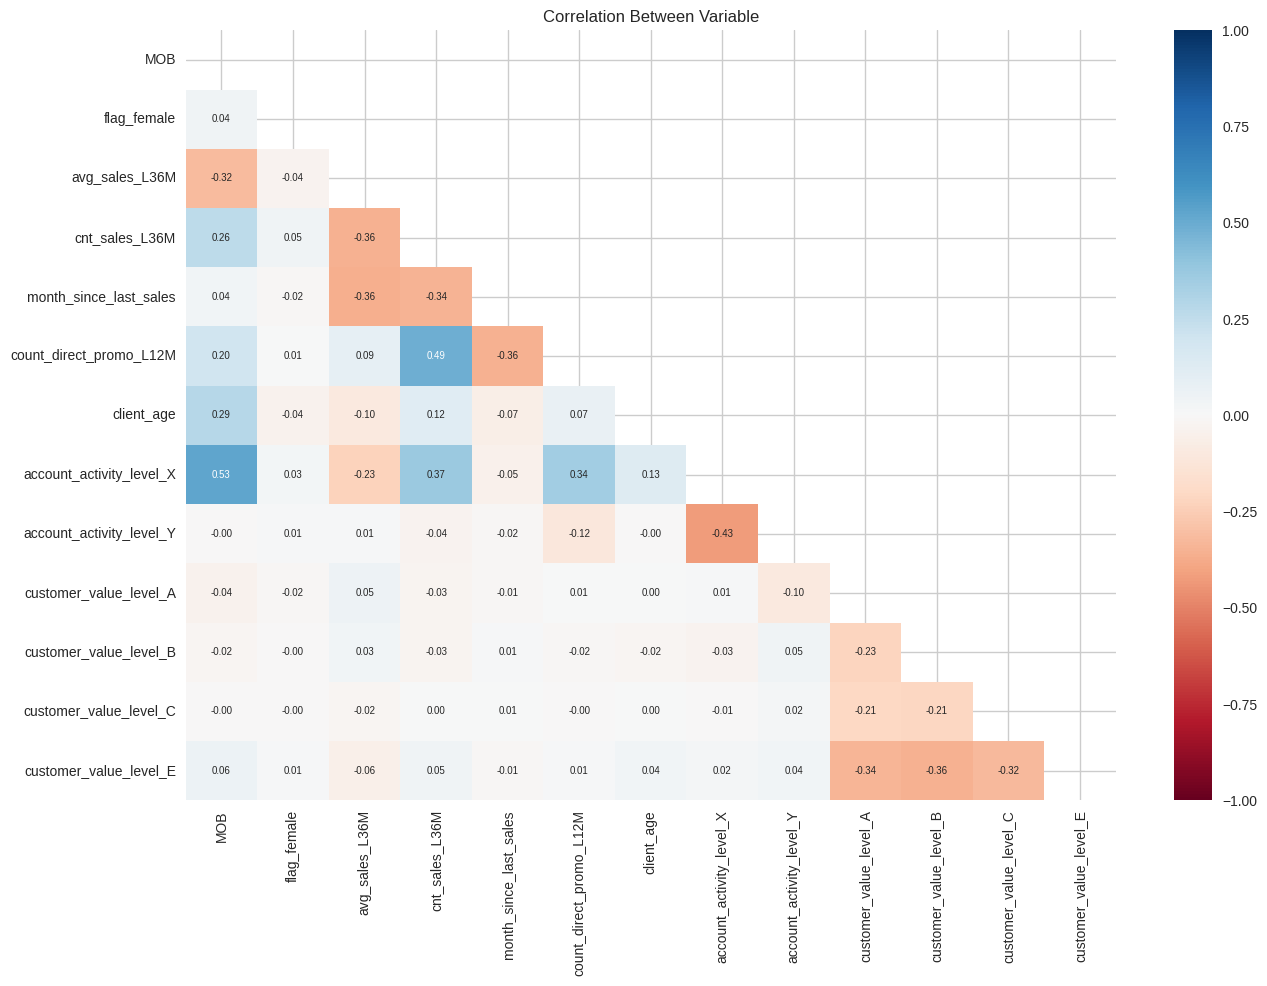

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

ax.set_title('Correlation Between Variable')

# To select only lower-triangle part of correlation matrix, we define masking like this
# Briefly, dia membuat matriks segitiga yang nilainya True di segitiga atas (matriks atas diagonal)
mask = np.triu(np.ones_like(
    x_training_model.corr(), dtype=bool))

sns.heatmap(x_training_model.corr(),
            vmin=-1, #nilai min heatmap
            vmax=1, #nilai max heatmap
            cmap='RdBu', #warna
            annot=True, #beri label
            mask=mask, #masking tadi ditaruh di sini
            annot_kws={"fontsize":7}, #fontsize label
            fmt=",.2f" #format angka di label
            )

plt.show()

In [ ]:
x_training_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11054 entries, 101011489 to 100112355
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MOB                       11054 non-null  float64
 1   flag_female               11054 non-null  int64  
 2   avg_sales_L36M            11054 non-null  float64
 3   cnt_sales_L36M            11054 non-null  int64  
 4   month_since_last_sales    11054 non-null  int64  
 5   count_direct_promo_L12M   11054 non-null  int64  
 6   client_age                11054 non-null  int64  
 7   account_activity_level_X  11054 non-null  uint8  
 8   account_activity_level_Y  11054 non-null  uint8  
 9   customer_value_level_A    11054 non-null  uint8  
 10  customer_value_level_B    11054 non-null  uint8  
 11  customer_value_level_C    11054 non-null  uint8  
 12  customer_value_level_E    11054 non-null  uint8  
dtypes: float64(2), int64(5), uint8(6)
memory usage: 755.6+

Dalam menghilangkan kolom-kolom yang berkorelasi tinggi untuk mencegah multicollinearity, sebetulnya bisa pakai metode kuantitatif (namanya VIF)
Ref: https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

Seperti distate di web, sebetulnya tidak wajib menghilangkan multicollinearity di data kita (dan tidak ada jaminan juga akurasi model akan membaik)

# Model Training & Application to Test Set

## Fit Logistic Regression Model


In [ ]:
# Karena kita ada timpang data yang ambil loan dan tidak, ada kemungkinan model akan biased
# Karena dia lebih sering melihat data yang tidak ambil loan. Jadi untuk anticipate bisa
# menggunakan class_weight='balanced'

# max_iter digunakan karena logistic regression mencari nilai optimal pakai iterasi. Kita batasi iterasi di 500 (default di 100)
model = LogisticRegression(class_weight='balanced', max_iter=500)
# Latih model kita dengan data predictor dan data target
model.fit(x_training_model, y_training)

LogisticRegression(class_weight='balanced', max_iter=500)

## Probability & Prediction of the Model

Use the model to generate probability to take the loan & prediction of the model

In [ ]:
# Untuk memprediksi label dari data kita, bisa pakai "modelnya.predict(datanya)"
model.predict(x_training_model)

array([0., 1., 0., ..., 0., 0., 1.])

In [ ]:
# Karena logistic regression basicnya pakai probability function, ada predicted probability tiap kelas
# Bisa pakai .predict_proba(). Index 0 di tiap row adalah prob untuk dia masuk class 0 (di konteks ini, not take the loan)
model.predict_proba(x_training_model)

# if index[1] predict_proba > 0.1: label = 1

array([[0.77323206, 0.22676794],
       [0.23138057, 0.76861943],
       [0.64077529, 0.35922471],
       ...,
       [0.62575759, 0.37424241],
       [0.66197116, 0.33802884],
       [0.38798204, 0.61201796]])

In [ ]:
# Prediksi data menggunakan model yang sudah dibuat
x_training2 = x_training_model.copy()

# Taruh prediksi label di kolom "prediction"
x_training2['prediction'] = model.predict(x_training_model)

# Taruh prediksi berapa probabilitas dia tidak ambil loan, dan ambil loan
x_training2[['prob_no','prob_takers']] = model.predict_proba(x_training_model)

x_training2[['prob_takers','prediction']]

,prob_takers,prediction
account_id,,
101011489,0.2268,0.0000
100424367,0.7686,1.0000
100870658,0.3592,0.0000
100814352,0.0870,0.0000
100676843,0.1826,0.0000
...,...,...
100204588,0.1545,0.0000
100194683,0.8562,1.0000
100579150,0.3742,0.0000


In [ ]:
# Lakukan hal sama untuk memprediksi data testing
x_test2 = x_test_model.copy()
x_test2['prediction'] = model.predict(x_test_model)
x_test2[['prob_no','prob_takers']] = model.predict_proba(x_test_model)
x_test2[['prob_takers','prediction']]

,prob_takers,prediction
account_id,,
100572074,0.6929,1.0000
100407609,0.6185,1.0000
100197215,0.4850,0.0000
100170616,0.4817,0.0000
100463081,0.0727,0.0000
...,...,...
100500457,0.3121,0.0000
100527530,0.6546,1.0000
100591719,0.0674,0.0000


# Model Evaluation

## Accuracy
Accuracy on the model can be checked using .score()

In [ ]:
# Accuracy dr prediksi model dengan data training
model.score(x_training_model, y_training)

0.7729328749773837

In [ ]:
# Accuracy dr prediksi model dengan data test
model.score(x_test_model, y_test)

0.7676234698184888

0utput: 0.77, artinya model kita bisa memprediksi scr akurat 77% dari data yang ada

## Confusion matrix
We can also check the confusion matrix using the confusion_matrix() report

In [ ]:
# Kita lihat hasil confusion matrix di data training
confusion_train = confusion_matrix(y_training, model.predict(x_training_model))
confusion_train

array([[7075, 2085],
       [ 425, 1469]])

Text(0.5, 1.0, 'Confusion Matrix Training Set')

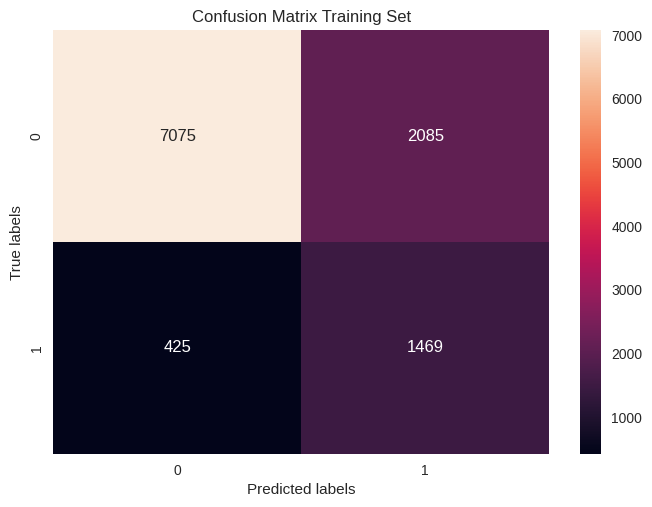

In [ ]:
# Gambar di heatmap dan beri label agar lebih mudah dipahami
sns.heatmap(confusion_train, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Training Set')

Contoh cara membaca: Ada 0 data yang actualnya FALSE (di konteks ini, tidak ambil loan), tapi dipredict oleh model kita TRUE (akan ambil loan)

In [ ]:
accuracy_train = (1469+7075)/(7075+2085+425+1469)
print(accuracy_train)

0.7729328749773837


Text(0.5, 1.0, 'Confusion Matrix Test Set')

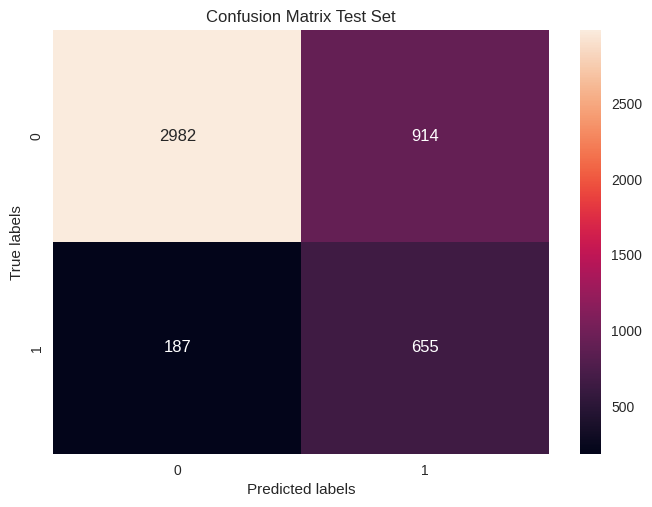

In [ ]:
# Lakukan hal yang sama untuk data di testing
confusion_test = confusion_matrix(y_test, model.predict(x_test_model))

sns.heatmap(confusion_test, annot=True, fmt = 'd')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Test Set')

In [ ]:
accuracy_test = (555+2982)/(555+2982+187+914)
print(accuracy_test)

0.7626131953428201


Di model classification lain, harus hati-hati jika akurasi di training lebih tinggi dari testing karena ada kemungkinan model kita overfitting (terlalu mempelajari pattern yang ada di training dan tidak generalized jadinya)

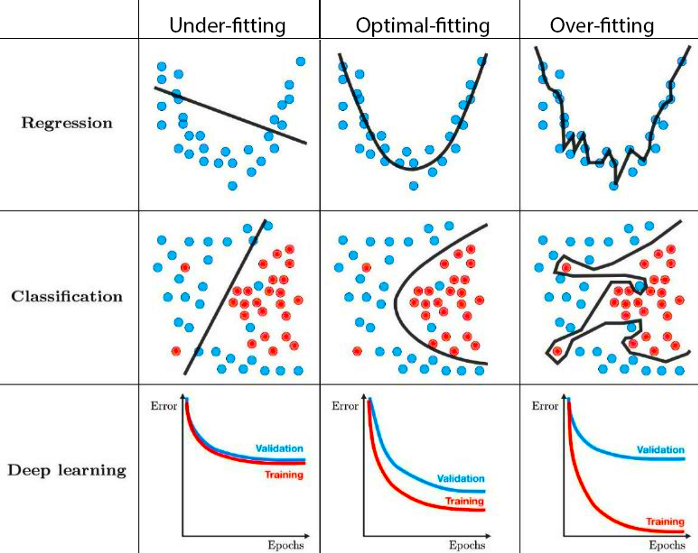

## Classification Report

In [ ]:
# Catatan: Kita harus bandingkan juga F1 Score antara training dan test
# Model yang baik seharusnya tidak jauh beda

In [ ]:
# Untuk melihat metrics lain selain akurasi, bisa menggunakan classification_report yang tadi kita import
print(classification_report(y_training, model.predict(x_training_model)))

              precision    recall  f1-score   support

         0.0       0.94      0.77      0.85      9160
         1.0       0.41      0.78      0.54      1894

    accuracy                           0.77     11054
   macro avg       0.68      0.77      0.69     11054
weighted avg       0.85      0.77      0.80     11054



**Overall Performance:**

**Accuracy:** The model seems to achieve a decent overall accuracy of 77%. However, due to the class imbalance, this metric can be misleading.

**Weighted Average:** Looking deeper, the weighted average metrics (weighted by the number of customers in each class) provide a more nuanced picture. Here, the precision (85%) is higher than recall (77%) and F1-score (80%).

**Class-Specific Performance:**

* **Non-PayLater Users (Class0.0):** The model performs well in identifying non-PayLater users with a high precision (94%) and a decent recall (77%). This means that when the model predicts someone as a non-PayLater user, it's usually correct (high precision), and it identifies a good portion of actual non-PayLater users (decent recall).

* **PayLater Users (Class1.0):** This is where the class imbalance becomes crucial. The model struggles with identifying actual PayLater users. While the recall (78%) seems reasonable, it's important to consider the number of samples in each class. Given the smaller number of PayLater users, a recall of 78% might still miss a significant portion of potential users. The lower precision (41%) suggests that out of those the model predicts as PayLater users, only a relatively small portion are actually PayLater users.

**Insights Considering Class Imbalance:**

The high accuracy might be misleading due to the class imbalance. The model could be achieving this accuracy by simply predicting the majority class (non-PayLater users) for most data points.

**Recommendations:**

* Focus on PayLater User Performance: Since identifying PayLater users is crucial for the campaign, prioritize metrics like recall and F1-score for the PayLater class (Class1.0).

Consider adjusting the model to improve recall for PayLater users. This could involve techniques like cost-sensitive learning or adjusting the classification threshold.
Analyze the model to understand why it misses potential PayLater users. This could help refine the targeting strategy for the outreach campaign.
Explore alternative evaluation metrics beyond accuracy. Depending on the business goals, metrics like cost-per-acquisition for a PayLater user might be more relevant.

Kesimpulan:
- Akurasi 77%, artinya model kita berhasil menebak 77% data dengan benar
<br><br>

Akurasi tidak semestinya jadi satu-satunya ukuran, apalagi jika data kita imbalanced. Mari kita lihat spesifik di class positif:
- Precision 41%, artinya dari semua yang dipredict positif (ambil loan) oleh model kita, ternyata hanya 42% yang memang benar-benar positif (somewhat presisi)
- Recall 78%, artinya model kita berhasil menebak 78% dengan benar dari semua data yang actualnya positive
<br><br>

Recall dan Precision akan tarik ulur.

Ilustrasi: https://mlu-explain.github.io/precision-recall/

Ref: https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall
<br><br>

Jika menginginkan model yang bisa balancing antara recall dan precision, bisa memperhatikan F1 untuk balanced scorenya.
- F1 29%(DARIMANA INI?), artinya model kita sebetulnya tidak terlalu balance performa recall dan precisionnya

In [ ]:
# Data test
print(classification_report(y_test, model.predict(x_test_model)))

              precision    recall  f1-score   support

         0.0       0.94      0.77      0.84      3896
         1.0       0.42      0.78      0.54       842

    accuracy                           0.77      4738
   macro avg       0.68      0.77      0.69      4738
weighted avg       0.85      0.77      0.79      4738



**Overall Performance:**

Accuracy: Both training (77%) and test data (77%) accuracy remain relatively consistent. This suggests the model might be generalizing well to unseen data. However, due to the class imbalance, accuracy alone doesn't provide a complete picture.

**Class-Specific Performance:**

**Non-PayLater Users (Class0.0):** The performance for non-PayLater users is very similar in both training and test data. The model maintains a high precision (around 94%) and decent recall (around 77%). This indicates consistency in identifying non-PayLater users across the data.

**PayLater Users (Class1.0):** Here, we see similar trends to the training data:
* Recall (around 78%): While seemingly reasonable, it's crucial to consider the smaller number of PayLater users. The model might still miss a significant portion of potential users.
* Precision (around 42%): This suggests that out of those predicted as PayLater users, only a relatively small portion are actually PayLater users, similar to the training data.

**Comparison and Impact of Class Imbalance:**

The class imbalance is evident in both training and test data reports. The model prioritizes predicting the majority class (non-PayLater users), leading to lower performance in identifying the minority class (PayLater users).
The consistency in performance between training and test data suggests the model might not be overfitting significantly. However, the limitations due to class imbalance remain.

O**verall Insights:**

The model shows consistency in its performance across training and test data.
The class imbalance significantly impacts the model's ability to identify PayLater users, which is crucial for the promotion.

## AUC-ROC Curve

AOC-ROC Curve biasanya digunakan untuk membandingkan antar model classifier. Misalnya, kita ada membuat model training yang tidak hanya pakai Logistic Regression, tetapi juga model lain (misalnya Random Forest, Decision Tree, SVM). Di sini, kita hanya training pakai Logistic Regression, tapi kita coba lihat curve untuk model kita.

Ilustrasi AUC-ROC: https://mlu-explain.github.io/roc-auc/

In [ ]:
# Create score from model
y_train_score = model.predict_proba(x_training_model)[:,1]
y_test_score = model.predict_proba(x_test_model)[:,1]

In [ ]:
y_train_score

array([0.22676794, 0.76861943, 0.35922471, ..., 0.37424241, 0.33802884,
       0.61201796])

In [ ]:
# Create holder for the FPR, TPR, and AUC-ROC data

# Training
fpr_train = dict()
tpr_train = dict()
auc_roc_train = dict()

# Test
fpr_test = dict()
tpr_test = dict()
auc_roc_test = dict()

In [ ]:
# Compute micro-average ROC curve and ROC area

# Train
fpr_train["micro"], tpr_train["micro"], _ = roc_curve(y_training, y_train_score.ravel())
auc_roc_train["micro"] = auc(fpr_train["micro"], tpr_train["micro"])

# Test
fpr_test["micro"], tpr_test["micro"], _ = roc_curve(y_test, y_test_score.ravel())
auc_roc_test["micro"] = auc(fpr_test["micro"], tpr_test["micro"])

In [ ]:
auc_roc_train["micro"]

0.8410257858648086

In [ ]:
auc_roc_test["micro"]

0.8357826042423682

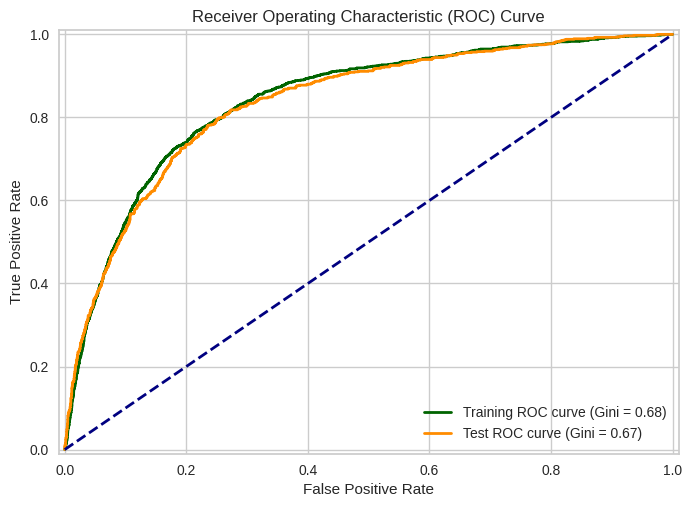

In [ ]:
# Create ROC-AUC Curve for training and test
plt.figure()
lw = 2
# Training
plt.plot(
    fpr_train["micro"],
    tpr_train["micro"],
    color = "darkgreen",
    lw=lw,
    label="Training ROC curve (Gini = %0.2f)" % (2*(auc_roc_train["micro"] - .5)),
)

# Testing
plt.plot(
    fpr_test["micro"],
    tpr_test["micro"],
    color = "darkorange",
    lw=lw,
    label="Test ROC curve (Gini = %0.2f)" % (2*(auc_roc_test["micro"] - .5)),
)
plt.plot([0,1],[0,1], color="navy", lw=lw, linestyle = '--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc = "lower right")
plt.show()

Insight:
hasil 0.84 dan 0.83 itu, makin dkt 1 berarti makin makin bagus. bisa pake gini tp patokannya pake AUC

## Decile Performance

Q: Apakah benar ketika peluang ambil loan itu semakin tinggi, memang semakin banyak orang yang ambil loan?

Di konteks ini, kita mengurutkan data kita ke dalam 10 rank berdasarkan probabilitasnya, dan masing-masing akan dilihat berapa banyak yang mengambil hutang di rank tersebut. Konsep dari decile performance ini seperti gambar berikut:

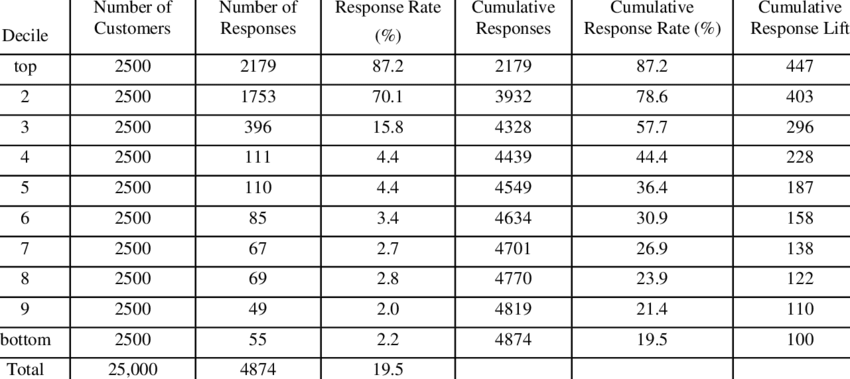

In [ ]:
# Create a prediction table for training set (mirip syntax kemarin)
x_training3 = x_training_model.copy()
x_training3['prediction'] = model.predict(x_training_model)
x_training3[['prob_no','prob_takers']] = model.predict_proba(x_training_model)
x_training3 = x_training3[['prob_takers','prediction']].copy()
x_training3

,prob_takers,prediction
account_id,,
101011489,0.2268,0.0000
100424367,0.7686,1.0000
100870658,0.3592,0.0000
100814352,0.0870,0.0000
100676843,0.1826,0.0000
...,...,...
100204588,0.1545,0.0000
100194683,0.8562,1.0000
100579150,0.3742,0.0000


In [ ]:
# Join dengan y_training untuk compare ke data actualnya
# Untuk join berdasarkan indexnya pakai left_index = True dan right_index = True
x_training3 = x_training3.merge(y_training, how='inner', left_index=True, right_index=True)
x_training3

,prob_takers,prediction,target
account_id,,,
101011489,0.2268,0.0000,0.0000
100424367,0.7686,1.0000,0.0000
100870658,0.3592,0.0000,0.0000
100814352,0.0870,0.0000,0.0000
100676843,0.1826,0.0000,0.0000
...,...,...,...
100204588,0.1545,0.0000,0.0000
100194683,0.8562,1.0000,0.0000
100579150,0.3742,0.0000,0.0000


In [ ]:
# Pakai probabilitynya untuk bikin 10 decile kategori
x_training3['binning'] = pd.qcut(x_training3['prob_takers'], q=10, precision=5)
x_training3

,prob_takers,prediction,target,binning
account_id,,,,
101011489,0.2268,0.0000,0.0000,"(0.17471, 0.23882]"
100424367,0.7686,1.0000,0.0000,"(0.65875, 0.80528]"
100870658,0.3592,0.0000,0.0000,"(0.32155, 0.41285]"
100814352,0.0870,0.0000,0.0000,"(0.074678, 0.12016]"
100676843,0.1826,0.0000,0.0000,"(0.17471, 0.23882]"
...,...,...,...,...
100204588,0.1545,0.0000,0.0000,"(0.12016, 0.17471]"
100194683,0.8562,1.0000,0.0000,"(0.80528, 0.99772]"
100579150,0.3742,0.0000,0.0000,"(0.32155, 0.41285]"


In [ ]:
# Kita sudah tidak butuh kolom prob_takers dan prediction, jadi kita drop
# Lalu kita akan lakukan value_counts() untuk kolom binning dan target, jadi akan dapat di masing-masing target ada berapa orang
# Karena value_counts() by default akan sort by angka terbanyak muncul, kita sort by index saja
x_training3= x_training3.drop(['prob_takers','prediction'], axis=1).value_counts().sort_index(ascending=False)
x_training3

target  binning              
1.0000  (0.80528, 0.99772]        662
        (0.65875, 0.80528]        471
        (0.52479, 0.65875]        288
        (0.41285, 0.52479]        176
        (0.32155, 0.41285]        109
        (0.23882, 0.32155]         49
        (0.17471, 0.23882]         52
        (0.12016, 0.17471]         37
        (0.074678, 0.12016]        31
        (0.0008518, 0.074678]      19
0.0000  (0.80528, 0.99772]        444
        (0.65875, 0.80528]        634
        (0.52479, 0.65875]        817
        (0.41285, 0.52479]        930
        (0.32155, 0.41285]        996
        (0.23882, 0.32155]       1056
        (0.17471, 0.23882]       1054
        (0.12016, 0.17471]       1068
        (0.074678, 0.12016]      1074
        (0.0008518, 0.074678]    1087
dtype: int64

Jika kemarin kita menggunakan workaround untuk mengubah data di atas menjadi pivot, kita bisa menggunakan unstack sebagai alternatif.

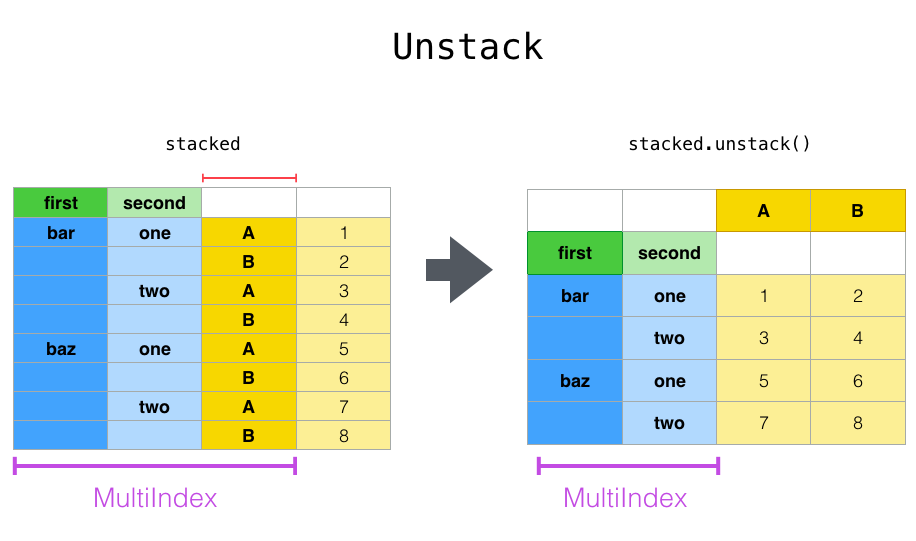

Referensi: https://jalammar.github.io/visualizing-pandas-pivoting-and-reshaping/

In [ ]:
# Jadi index paling kanan akan jadi kolom
x_training3.unstack()

binning,"(0.0008518, 0.074678]","(0.074678, 0.12016]","(0.12016, 0.17471]","(0.17471, 0.23882]","(0.23882, 0.32155]","(0.32155, 0.41285]","(0.41285, 0.52479]","(0.52479, 0.65875]","(0.65875, 0.80528]","(0.80528, 0.99772]"
target,,,,,,,,,,
0.0000,1087,1074,1068,1054,1056,996,930,817,634,444
1.0000,19,31,37,52,49,109,176,288,471,662


In [ ]:
# Bisa transpose data di atas
x_training3.unstack().T

# Alternatif:
# Jika kita ingin membuat kolom index tertentu sebagai kolomnya, maka dispecify pakai level=indeksnya
# x_training3.unstack(level=0)

target,0.0000,1.0000
binning,,
"(0.0008518, 0.074678]",1087,19
"(0.074678, 0.12016]",1074,31
"(0.12016, 0.17471]",1068,37
"(0.17471, 0.23882]",1054,52
"(0.23882, 0.32155]",1056,49
"(0.32155, 0.41285]",996,109
"(0.41285, 0.52479]",930,176
"(0.52479, 0.65875]",817,288
"(0.65875, 0.80528]",634,471


In [ ]:
# Save di variabel setelah kita dapat hasil sesuai. Jangan lupa fillna() krn ada beberapa NaN
df_prop = x_training3.unstack().T.fillna(0)
# Rename nama kolomnya agar menambah clarity
df_prop.columns = ['actual_#non_takers', 'actual_#takers']

df_prop

,actual_#non_takers,actual_#takers
binning,,
"(0.0008518, 0.074678]",1087,19
"(0.074678, 0.12016]",1074,31
"(0.12016, 0.17471]",1068,37
"(0.17471, 0.23882]",1054,52
"(0.23882, 0.32155]",1056,49
"(0.32155, 0.41285]",996,109
"(0.41285, 0.52479]",930,176
"(0.52479, 0.65875]",817,288
"(0.65875, 0.80528]",634,471


In [ ]:
# Tambah total orang tiap "binning" (bisa pakai df_prop.sum(axis=1) utk jumlah semua kolom sebenernya)
df_prop['total_obs'] = df_prop['actual_#non_takers'] + df_prop['actual_#takers']

# Hitung probability actual takers
df_prop['prob_takers'] = df_prop['actual_#takers']/df_prop['total_obs']

# Hitung proporsi dari actual non-taker dan taker dr keseluruhan orang di masing-masing kategori
# Hitung total semua orang per kategori dulu
nontakers = df_prop['actual_#non_takers'].sum()
takers = df_prop['actual_#takers'].sum()
# Jadikan kolom baru
df_prop['%non_takers'] = df_prop['actual_#non_takers']/nontakers
df_prop['%takers'] = df_prop['actual_#takers']/takers
df_prop

,actual_#non_takers,actual_#takers,total_obs,prob_takers,%non_takers,%takers
binning,,,,,,
"(0.0008518, 0.074678]",1087,19,1106,0.0172,0.1187,0.0100
"(0.074678, 0.12016]",1074,31,1105,0.0281,0.1172,0.0164
"(0.12016, 0.17471]",1068,37,1105,0.0335,0.1166,0.0195
"(0.17471, 0.23882]",1054,52,1106,0.0470,0.1151,0.0275
"(0.23882, 0.32155]",1056,49,1105,0.0443,0.1153,0.0259
"(0.32155, 0.41285]",996,109,1105,0.0986,0.1087,0.0576
"(0.41285, 0.52479]",930,176,1106,0.1591,0.1015,0.0929
"(0.52479, 0.65875]",817,288,1105,0.2606,0.0892,0.1521
"(0.65875, 0.80528]",634,471,1105,0.4262,0.0692,0.2487


In [ ]:
# Buat cumulative pct dari masing-masing kategori
df_prop['cumm%_non_takers'] = df_prop['%non_takers'].cumsum()
df_prop['cumm%_takers'] = df_prop['%takers'].cumsum()

# Q: Apakah benar ketika peluang activasi paylater itu semakin tinggi, memang semakin banyak orang yang activasi paylater?
df_prop

,actual_#non_takers,actual_#takers,total_obs,prob_takers,%non_takers,%takers,cumm%_non_takers,cumm%_takers
binning,,,,,,,,
"(0.0008518, 0.074678]",1087,19,1106,0.0172,0.1187,0.0100,0.1187,0.0100
"(0.074678, 0.12016]",1074,31,1105,0.0281,0.1172,0.0164,0.2359,0.0264
"(0.12016, 0.17471]",1068,37,1105,0.0335,0.1166,0.0195,0.3525,0.0459
"(0.17471, 0.23882]",1054,52,1106,0.0470,0.1151,0.0275,0.4676,0.0734
"(0.23882, 0.32155]",1056,49,1105,0.0443,0.1153,0.0259,0.5829,0.0993
"(0.32155, 0.41285]",996,109,1105,0.0986,0.1087,0.0576,0.6916,0.1568
"(0.41285, 0.52479]",930,176,1106,0.1591,0.1015,0.0929,0.7931,0.2497
"(0.52479, 0.65875]",817,288,1105,0.2606,0.0892,0.1521,0.8823,0.4018
"(0.65875, 0.80528]",634,471,1105,0.4262,0.0692,0.2487,0.9515,0.6505


In [ ]:
# It's better to target clients with probability higher than 0.527 = > 0.53
(288+47+662)/(2*1105+1106)

0.30066344993968636

Jadi 30% orang bakalan activasi paylater dari probalitas diatas 50%

## Kolmogorov-Smirnov Statistics (KS Statistics)

Used to see whether the score have power to distinguish between takers and non-takers

KS benchmark-nya adalah 40

In [ ]:
ks_statistics = 100*(df_prop['cumm%_non_takers'] - df_prop['cumm%_takers']).max()
ks_statistics

54.33862622946284

54% jd makin tinggi makin bagus untuk membedakan datanya

# UNUSED HEADER

Review the data dictionary for the pilot dataset. Understand the contents of each table and the meanings of their columns. Identify important columns that can be used for joining the transaction behavior table. Take note of any special values defined in the dictionary, if any. Clearly state the target variable of the propensity model in your presentation. Define the past, present, and future periods for the model. (Hint: The target variable for this propensity model should be whether the customer already activating and using PayLater (XSELL_SUCCESS = 1 and XSELL_SALES > 0). The future period should align with the pilot period.)

In [ ]:
y_test.head()

account_id
100572074   0.0000
100407609   0.0000
100197215   1.0000
100170616   0.0000
100463081   0.0000
Name: target, dtype: float64

Utilize your knowledge about the dataset (from EDA and clustering results in the Intermediate Assignment) along with additional exploration. Create new features for the propensity model, ensuring that data from the future is excluded. Encode categorical variables appropriately. (Hint: XSELL-related variables should NOT be used as features to avoid data leakage. Consider using features such as total sales, promo usage, age groups, and segmentation clusters.)

Combine the transaction behavior and pilot dataset, and create a training and a

1.   List item
2.   List item

testing dataset.

Conduct a correlation check on the training dataset and report the result in your presentation, including any variable removal you may do. Check whether the training data is an unbalanced dataset

## PROPENSITY MODEL TRAINING AND EVALUATION

Build a model to predict the target variable using the training dataset.
Apply the trained model to the test dataset and evaluate its performance.


Assess the accuracy of the model's predictions in both the training and test datasets. Is there a noticeable difference in accuracy between the two? **(Hint: Use the .score() function in model sklearn object)**


Examine the confusion matrix and classification report of the model in both the training and test datasets. Interpret the precision and recall metrics based on the confusion matrix. Is there a noticeable difference between the training and test datasets? **(Hint: Pay attention to the prediction of the positive class; that is, customers already activating AND using PayLater)**

Produce a decile-based performance report for your model. Are there noticeable rank breaks among the deciles? Do the top deciles effectively identify the most promising Pay Later customers? **(Hint: Compute predicted probabilities for both the training and test sets, then divide them into 10 decile groups using the qcut() function. Within each probability group, determine the count of positive class instances. Do higher probabilities correspond to a larger count of positive instances?)**

Based on the findings from the previous steps, conclude the suitability of your

1.   List item
2.   List item

model in identifying the most promising pay-later customers.

## **(Optional, Challenge) Cost Benefit Analysis**

As data analysts, we must maintain our curiosity and continuously expand our knowledge. Feel free to explore more about Benefit-Cost Analysis. Try to integrate the model probability predictions with the dataset in step 4. Select the top 30,000 RevoShop customers who have never used the PayLater feature but are highly likely to adopt it. We’ve provided the benefit-cost analysis template to assess the potential impact of Project Contact. (Hint: Remove all customers from the dataset in step 4 who have already using PayLater (XSELL_SUCCESS = 1 and XSELL_SALES > 0). Next, apply the model to calculate the probability of these remaining customers using PayLater. Sort the data based on the calculated probabilities and select the top 1,000 customers with the highest probability.).